# Buy or Sell
Testing known methods on Microsoft, Apple and HP Stockprice to see if they work. Obviously just using 3 Stocks is not statisticly significant, but testing it on hundreds or thousands of stocks takes to long/ Visualizing takes a lot of space, which was a Priority to me.

# Imports

In [1]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import statistics

import pandas_datareader as web

#plot
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
plt.style.use("fivethirtyeight")

print("Import successful")

#if you don't like the warnings
# import warnings
# warnings.filterwarnings("ignore")

Import successful


# Data

## Microsoft
I will all Microsoft MS not MSFT

In [2]:
dfMS=web.DataReader("MSFT", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfMS.drop(["High", "Low", "Open", "Volume", "Close"], axis=1, inplace=True)
dfMS.head()

,Adj Close
Date,
2010-01-04,24.105360
2010-01-05,24.113148
2010-01-06,23.965164
2010-01-07,23.715933
2010-01-08,23.879499


Text(0, 0.5, 'Adj Close Prtice USD ($)')

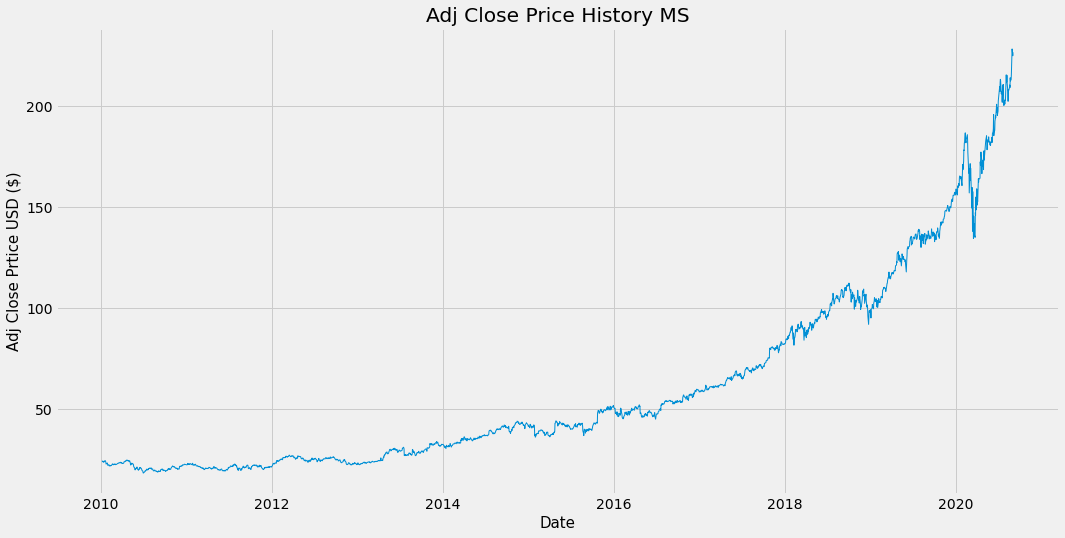

In [3]:
plt.figure(figsize=(16,8))
plt.title("Adj Close Price History MS")
plt.plot(dfMS["Adj Close"],linewidth=1)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)

## Apple

In [4]:
dfA=web.DataReader("AAPL", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfA.drop(["High", "Low", "Open", "Volume", "Close"], axis=1, inplace=True)
dfA.head()

,Adj Close
Date,
2010-01-04,6.539882
2010-01-05,6.551187
2010-01-06,6.446983
2010-01-07,6.435065
2010-01-08,6.477847


Text(0, 0.5, 'Adj Close Prtice USD ($)')

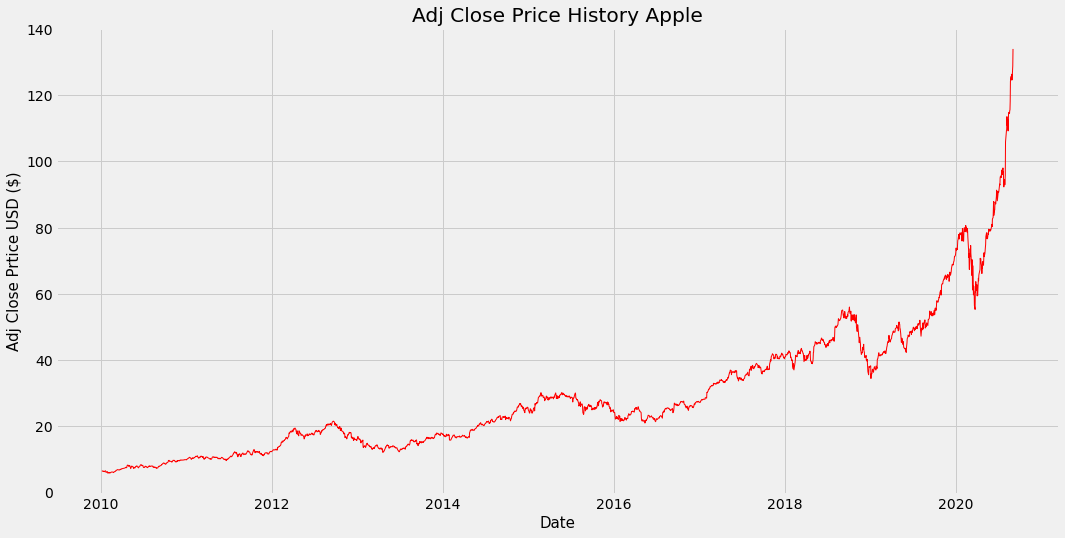

In [5]:
plt.figure(figsize=(16,8))
plt.title("Adj Close Price History Apple")
plt.plot(dfA["Adj Close"],linewidth=1, color="red")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)

## HP

In [6]:
dfHP=web.DataReader("HP", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfHP.drop(["High", "Low", "Open", "Volume", "Close"], axis=1, inplace=True)
dfHP.head()

,Adj Close
Date,
2010-01-04,27.837137
2010-01-05,29.461746
2010-01-06,30.535982
2010-01-07,30.728279
2010-01-08,31.829037


Text(0, 0.5, 'Adj Close Prtice USD ($)')

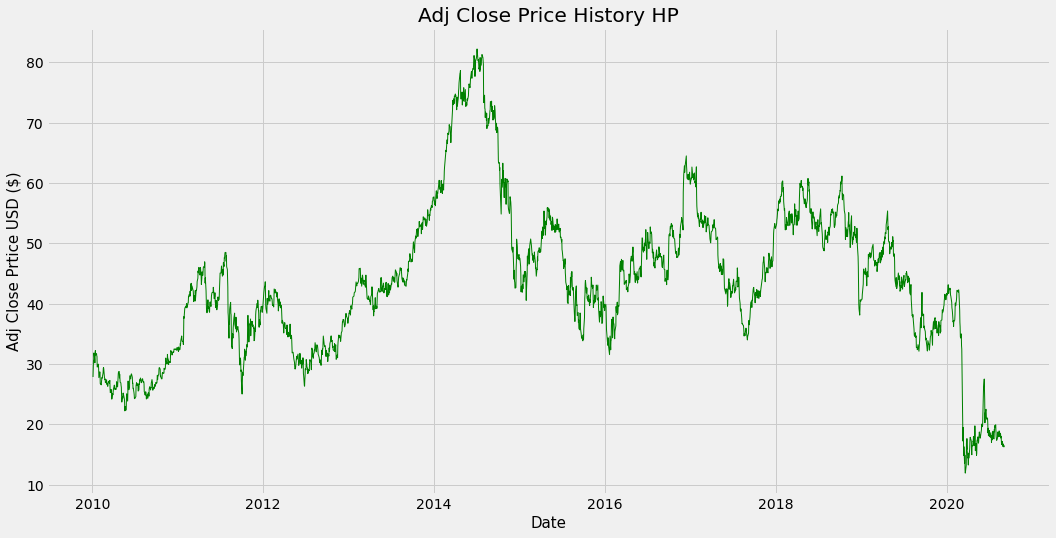

In [7]:
plt.figure(figsize=(16,8))
plt.title("Adj Close Price History HP")
plt.plot(dfHP["Adj Close"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)

## all Data

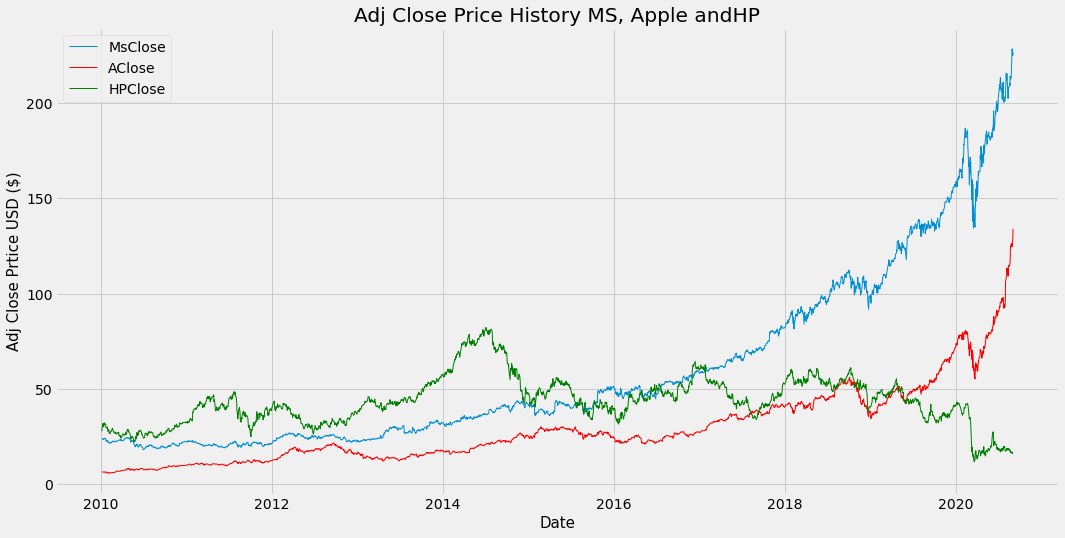

In [8]:
plt.figure(figsize=(16,8))
plt.title("Adj Close Price History MS, Apple andHP")
plt.plot(dfMS["Adj Close"],linewidth=1)
plt.plot(dfA["Adj Close"],linewidth=1, color="red")
plt.plot(dfHP["Adj Close"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["MsClose","AClose","HPClose"], loc="upper left")

It is easy to see, that the stocks don't perform the same, which is good, because I want to test the Methods on different data.

# Methods
searching methods online and testing them.
1. How to Interpret and Use Moving Averages in Trading
2. Best MACD trading strategies 1

# 1. How to Interpret and Use Moving Averages in Trading
https://www.dummies.com/personal-finance/investing/stocks-trading/how-to-interpret-and-use-moving-averages-in-trading/

"One simple mechanical strategy that some traders employ works like this:

- Buy when the moving average slopes upward and the closing price crosses above the moving average.

- Close the position when the price closes below the moving average.

- Sell short when the moving average slopes downward and the closing price crosses below the moving average.

- Close the short position when the price closes above the moving average.
"

Notes:
- Not sure how long the SMA is(found 5 days, 30, 60...) and performance should vary if we change the length

# 1.1 methods for everyone

In [9]:
def slopeUp(dfSMA, i):# check if stock is moving upwards  (ugly)
    if dfSMA[i]>dfSMA[i-2]>dfSMA[i-3]>dfSMA[i-4]>dfSMA[i-5]:
        return True
    elif dfSMA[i]>dfSMA[i-1]>dfSMA[i-3]>dfSMA[i-4]>dfSMA[i-5]:
        return True
    elif dfSMA[i]>dfSMA[i-1]>dfSMA[i-2]>dfSMA[i-4]>dfSMA[i-5]:
        return True
    elif dfSMA[i]>dfSMA[i-1]>dfSMA[i-2]>dfSMA[i-3]>dfSMA[i-5]:
        return True
    elif dfSMA[i]>dfSMA[i-1]>dfSMA[i-2]>dfSMA[i-3]>dfSMA[i-4]:
        return True
    return False

In [10]:
def slopeDown(dfSMA, i):# check if stock is moving downwards  (ugly)
    if dfSMA[i]<dfSMA[i-2]<dfSMA[i-3]<dfSMA[i-4]<dfSMA[i-5]:
        return True
    elif dfSMA[i]<dfSMA[i-1]<dfSMA[i-3]<dfSMA[i-4]<dfSMA[i-5]:
        return True
    elif dfSMA[i]<dfSMA[i-1]<dfSMA[i-2]<dfSMA[i-4]<dfSMA[i-5]:
        return True
    elif dfSMA[i]<dfSMA[i-1]<dfSMA[i-2]<dfSMA[i-3]<dfSMA[i-5]:
        return True
    elif dfSMA[i]<dfSMA[i-1]<dfSMA[i-2]<dfSMA[i-3]<dfSMA[i-4]:
        return True
    return False

In [11]:
def SMA15BuyAlg(df):
    start=36
    buy=[]
    sell=[]
    short=[]
    buyback=[]
    for _ in range(start):
        buyback.append(np.nan)
        buy.append(np.nan)
        sell.append(np.nan)
        short.append(np.nan)
    above=None # 1 above -1 below
    for i in range(start,df.shape[0]):
        #Buy when the moving average slopes upward(decided arbitrarily 5 days as info not clear) and the closing price crosses above the moving average.
        if ( slopeUp(df.SMA15,i) and above!=1 and df.SMA15[i]>df["Adj Close"][i]):
                buy.append(df["Adj Close"][i])
                sell.append(np.nan)
                short.append(np.nan)
                buyback.append(np.nan)
                above=1
                
        #Close the position when the price closes below the moving average.        
        elif (above==1 and df.SMA15[i]>df["Adj Close"][i]):
            sell.append(df["Adj Close"][i])
            buy.append(np.nan)
            short.append(np.nan)
            buyback.append(np.nan)
            above=0
            
        #Sell short when the moving average slopes downward and the closing price crosses below the moving average.
        elif (slopeDown(df.SMA15,i)  and above!=-1 and df.SMA15[i]<df["Adj Close"][i]):
                short.append(df["Adj Close"][i])
                buy.append(np.nan)
                sell.append(np.nan)
                buyback.append(np.nan)
                above=-1
        #Close the short position when the price closes above the moving average.
        elif (above==-1 and df.SMA15[i]<df["Adj Close"][i]):
            buyback.append(df["Adj Close"][i])
            buy.append(np.nan)
            sell.append(np.nan)
            short.append(np.nan)
            above=0
        #do nothing
        else:
            buyback.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            short.append(np.nan)
            
    return buy, sell, short, buyback

In [12]:
def createLog15(df):# creating a shortened log of the price when we bought/sold...
    bought=[df["Adj Close"][x] for x in df.index if not math.isnan(df["15Buy"][x])]
    sold=[df["Adj Close"][x] for x in df.index if not math.isnan(df["15Sell"][x])]
    shorted=[df["Adj Close"][x] for x in df.index if not math.isnan(df["15Short"][x])]
    boughtback=[df["Adj Close"][x] for x in df.index if not math.isnan(df["15Buyback"][x])]
    return bought, sold, shorted, boughtback

In [13]:
def SMA30BuyAlg(df):
    start=36
    buy=[]
    sell=[]
    short=[]
    buyback=[]
    for _ in range(start):
        buyback.append(np.nan)
        buy.append(np.nan)
        sell.append(np.nan)
        short.append(np.nan)
    above=None # 1 above -1 below
    for i in range(start,df.shape[0]):
        #Buy when the moving average slopes upward(decided arbitrarily 5 days as info not clear) and the closing price crosses above the moving average.
        if ( slopeUp(df.SMA30,i) and above!=1 and df.SMA30[i]>df["Adj Close"][i]):
                buy.append(df["Adj Close"][i])
                sell.append(np.nan)
                short.append(np.nan)
                buyback.append(np.nan)
                above=1
                
        #Close the position when the price closes below the moving average.        
        elif (above==1 and df.SMA30[i]>df["Adj Close"][i]):
            sell.append(df["Adj Close"][i])
            buy.append(np.nan)
            short.append(np.nan)
            buyback.append(np.nan)
            above=0
            
        #Sell short when the moving average slopes downward and the closing price crosses below the moving average.
        elif (slopeDown(df.SMA30,i) and above!=-1 and df.SMA30[i]<df["Adj Close"][i]):
                short.append(df["Adj Close"][i])
                buy.append(np.nan)
                sell.append(np.nan)
                buyback.append(np.nan)
                above=-1
        #Close the short position when the price closes above the moving average.
        elif (above==-1 and df.SMA30[i]<df["Adj Close"][i]):
            buyback.append(df["Adj Close"][i])
            buy.append(np.nan)
            sell.append(np.nan)
            short.append(np.nan)
            above=0
        #do nothing
        else:
            buyback.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            short.append(np.nan)
        
    
    return buy, sell, short, buyback

In [14]:
def createLog30(df):# creating a shortened log of the price when we bought/sold...
    bought=[df["Adj Close"][x] for x in df.index if not math.isnan(df["30Buy"][x])]
    sold=[df["Adj Close"][x] for x in df.index if not math.isnan(df["30Sell"][x])]
    shorted=[df["Adj Close"][x] for x in df.index if not math.isnan(df["30Short"][x])]
    boughtback=[df["Adj Close"][x] for x in df.index if not math.isnan(df["30Buyback"][x])]
    return bought, sold, shorted, boughtback

# 1.2.1 Microsoft

In [15]:
dfMSSMA=dfMS.copy()

In [16]:
for i in range(30+1,dfMSSMA.shape[0]):#SMA with 15 days
    dfMSSMA.loc[dfMSSMA.index[i],'SMA15'] = ((dfMSSMA["Adj Close"][i-15:i].sum())/15)
for i in range(30+1,dfMSSMA.shape[0]):#SMA with 30 days
    dfMSSMA.loc[dfMSSMA.index[i],'SMA30'] = ((dfMSSMA["Adj Close"][i-30:i].sum())/30)

In [17]:
dfMSSMA.tail()

,Adj Close,SMA15,SMA30
Date,,,
2020-08-26,220.572525,210.405890,207.999674
2020-08-27,225.988358,210.985938,208.452213
2020-08-28,228.312271,211.700847,209.221923
2020-08-31,224.941086,212.827391,210.103589
2020-09-01,226.676559,214.009775,210.583675


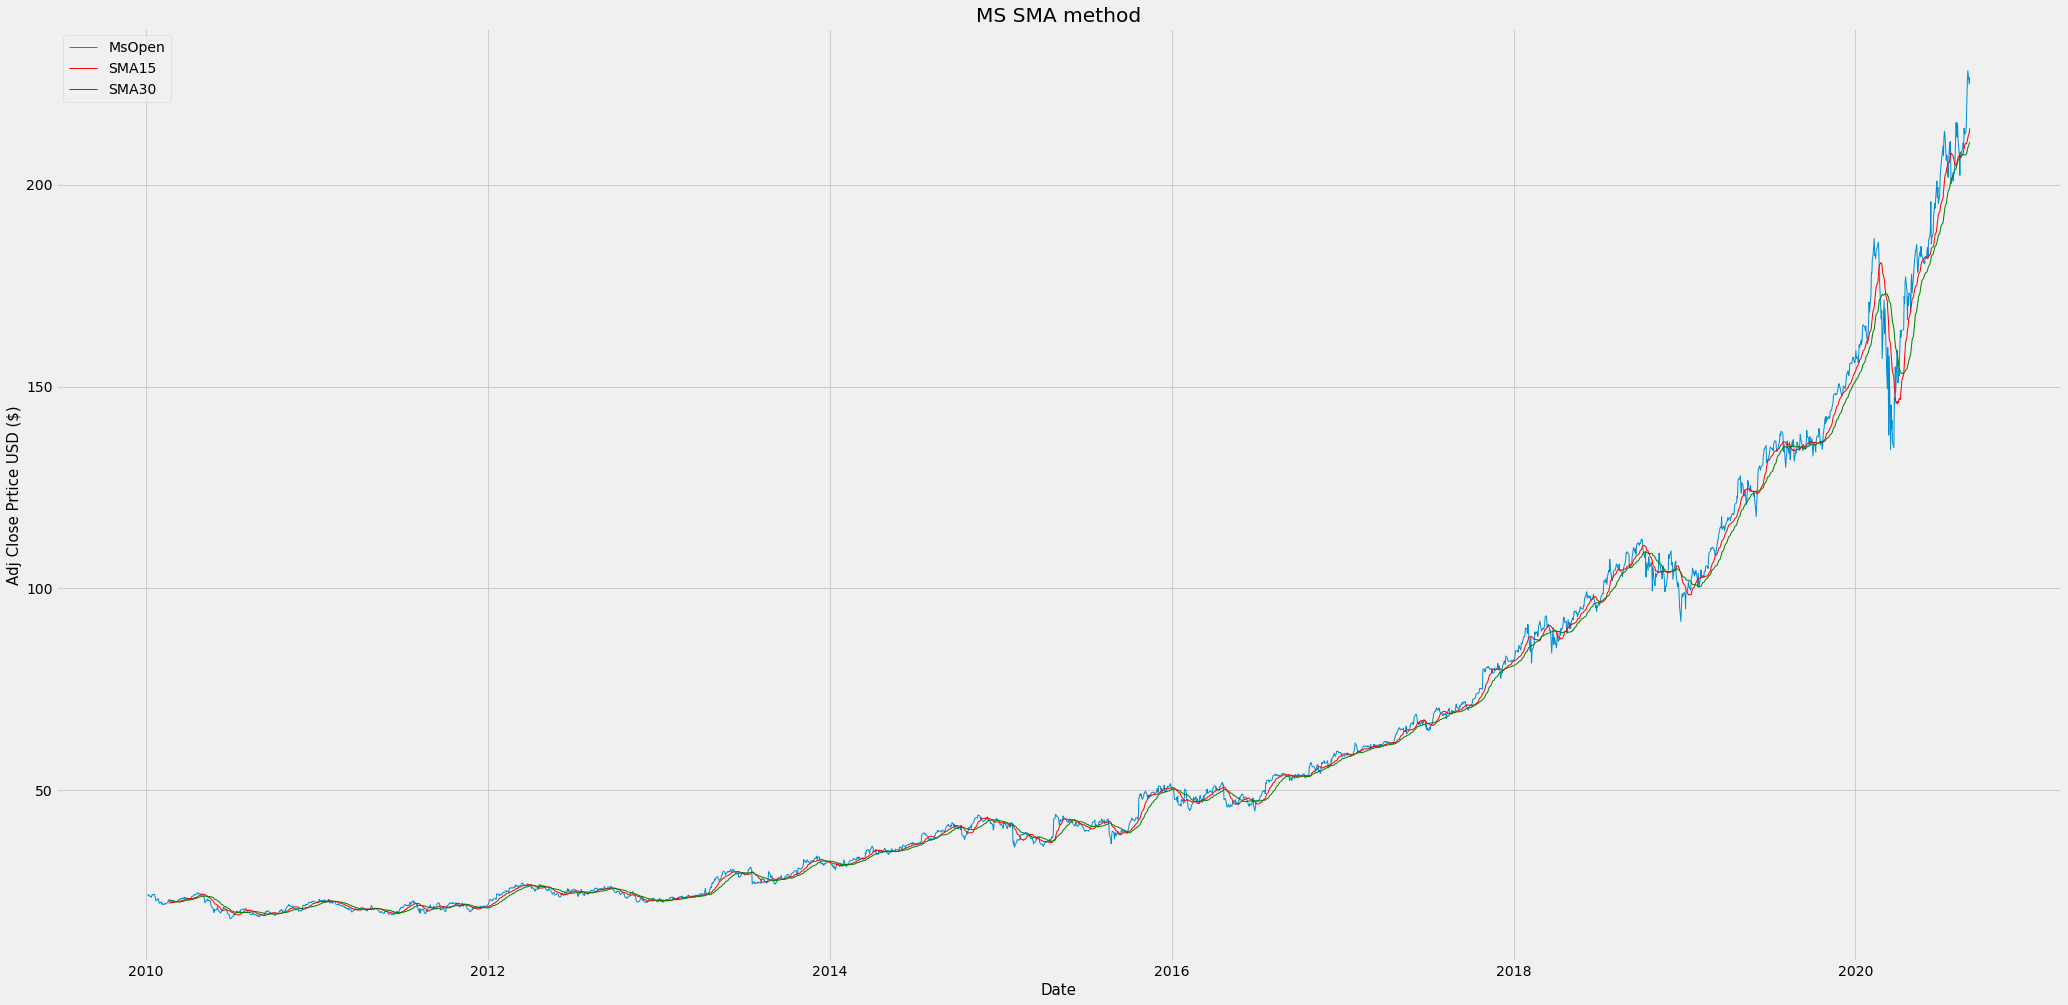

In [18]:
plt.figure(figsize=(16*2,8*2))
plt.title("MS SMA method")
plt.plot(dfMSSMA["Adj Close"],linewidth=1)
plt.plot(dfMSSMA["SMA15"],linewidth=1, color="red")
plt.plot(dfMSSMA["SMA30"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","SMA30"], loc="upper left") # hard to see because it is a long timespan

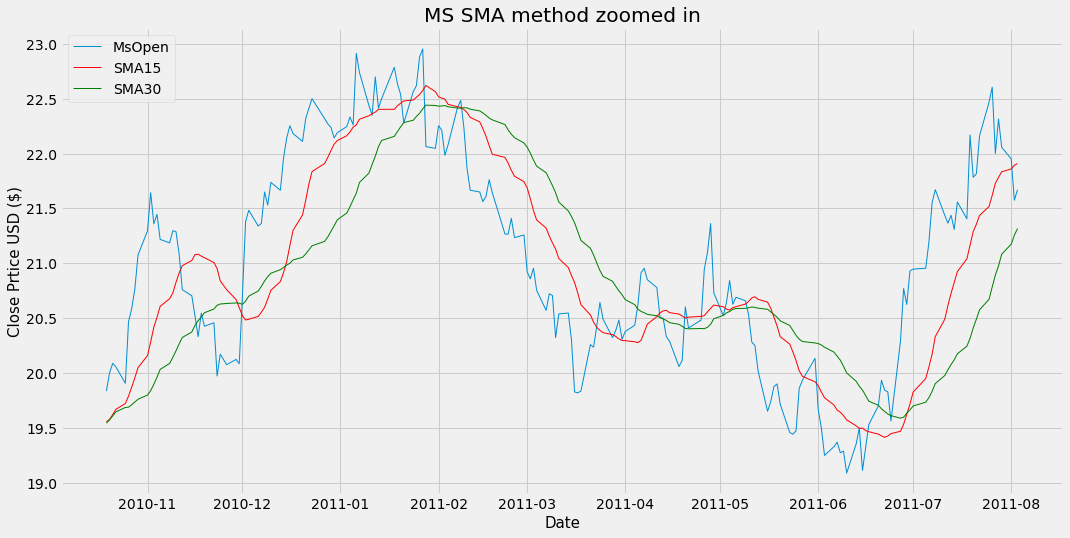

In [19]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in")
plt.plot(dfMSSMA["Adj Close"][200:400],linewidth=1)
plt.plot(dfMSSMA["SMA15"][200:400],linewidth=1, color="red")
plt.plot(dfMSSMA["SMA30"][200:400],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","SMA30"], loc="upper left") #zommed in

Both SMA seem to behave similarly, but there is still a difference

# SMA15

In [20]:
MSSMA15Buy, MSSMA15Sell, MSSMA15Short, MSSMA15Buyback=SMA15BuyAlg(dfMSSMA)

In [21]:
dfMSSMA["15Buy"]=MSSMA15Buy
dfMSSMA["15Sell"]=MSSMA15Sell
dfMSSMA["15Short"]=MSSMA15Short
dfMSSMA["15Buyback"]=MSSMA15Buyback
dfMSSMA.head()

,Adj Close,SMA15,SMA30,15Buy,15Sell,15Short,15Buyback
Date,,,,,,,
2010-01-04,24.105360,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,24.113148,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,23.965164,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,23.715933,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,23.879499,NaN,NaN,NaN,NaN,NaN,NaN


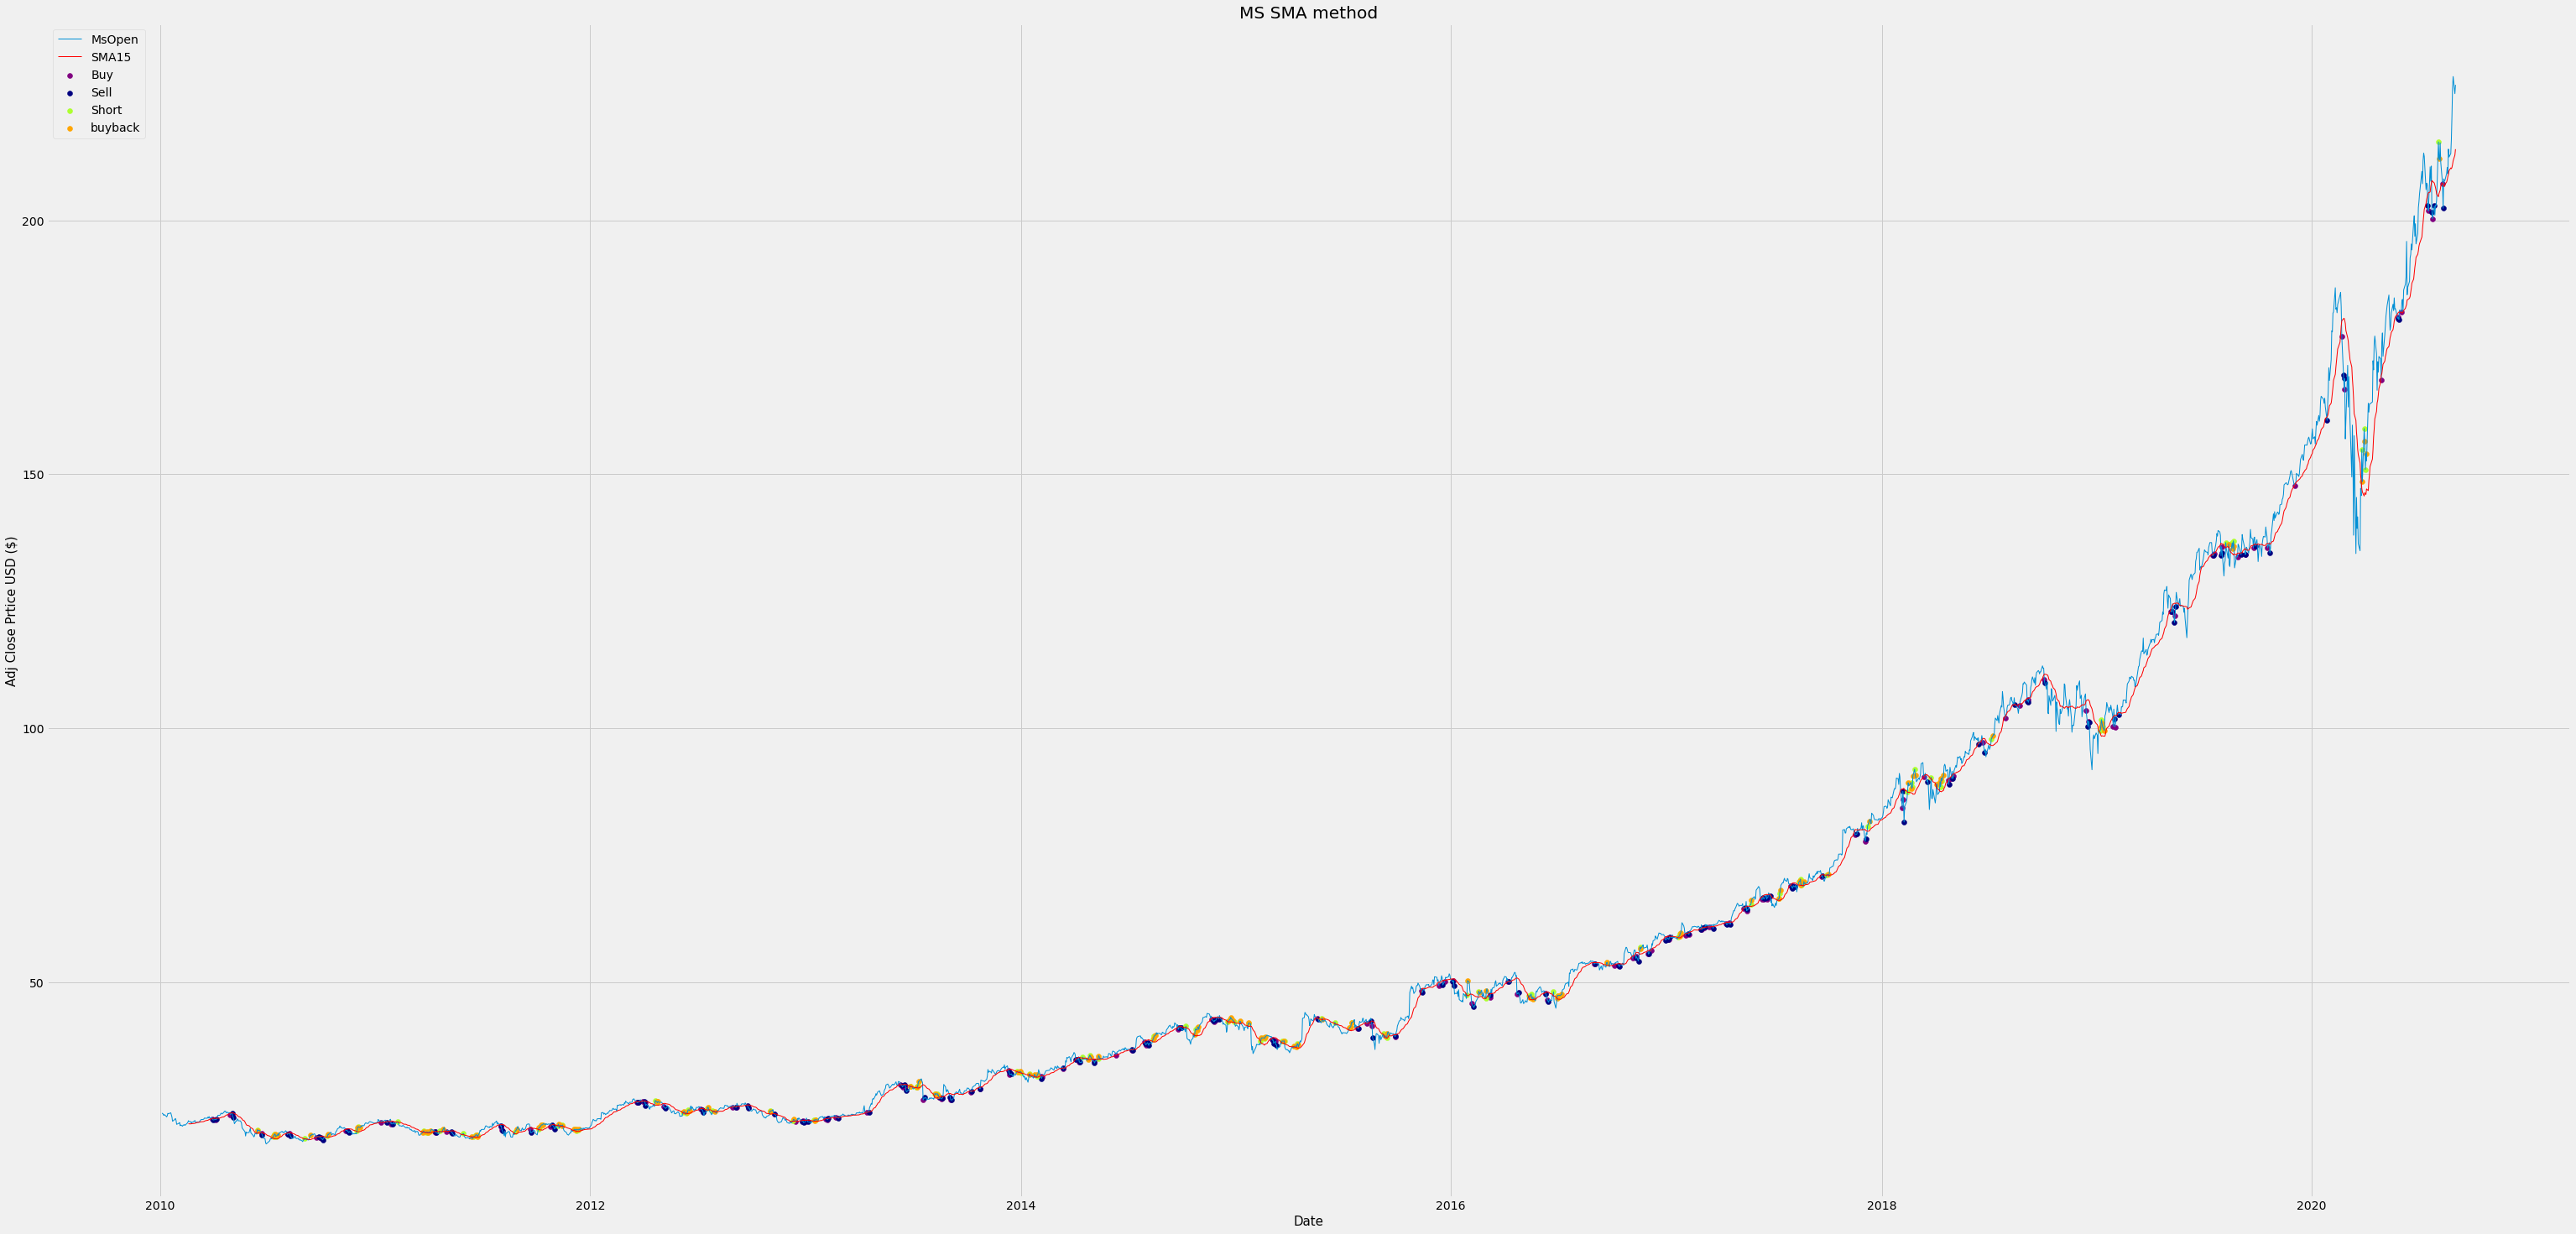

In [22]:
plt.figure(figsize=(16*3,8*3))
plt.title("MS SMA method")

plt.plot(dfMSSMA["Adj Close"],linewidth=1)
plt.plot(dfMSSMA["SMA15"],linewidth=1, color="red")

plt.scatter(dfMSSMA.index,dfMSSMA["15Buy"], color="purple")
plt.scatter(dfMSSMA.index,dfMSSMA["15Sell"], color="navy")
plt.scatter(dfMSSMA.index,dfMSSMA["15Short"], color="greenyellow")
plt.scatter(dfMSSMA.index,dfMSSMA["15Buyback"], color="orange")

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

it's impossible to see stuff, so i will make smaller plots to analyze

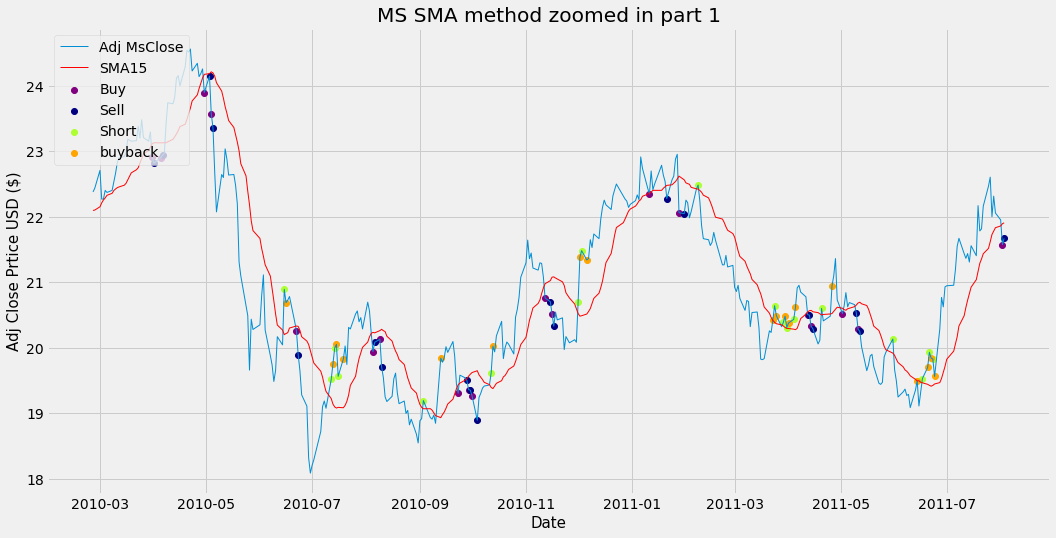

In [23]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 1")

plt.plot(dfMSSMA["Adj Close"][36:400],linewidth=1)
plt.plot(dfMSSMA["SMA15"][36:400],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Buy"][36:400], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Sell"][36:400], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Short"][36:400], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Buyback"][36:400], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj MsClose","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

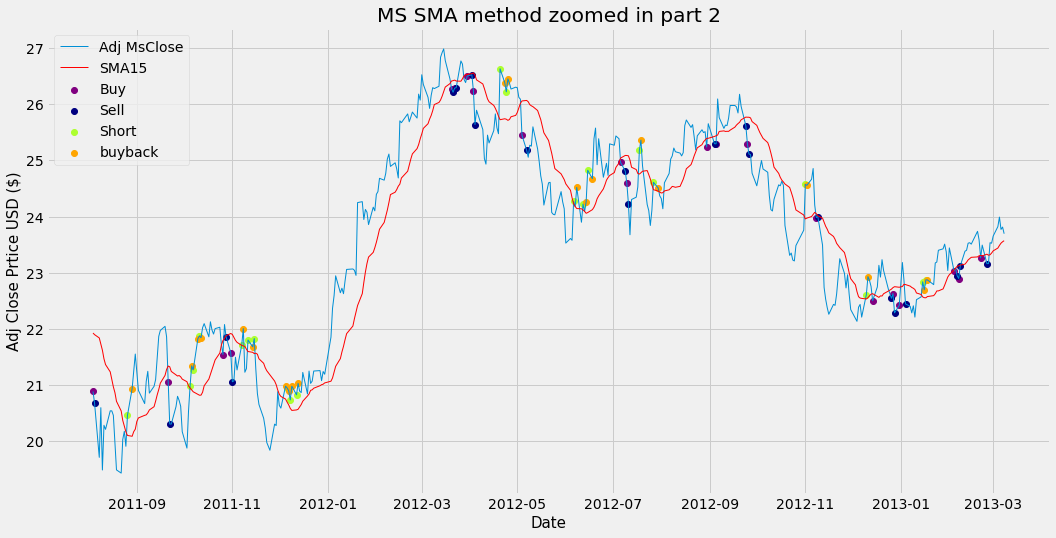

In [24]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 2")

plt.plot(dfMSSMA["Adj Close"][400:800],linewidth=1)
plt.plot(dfMSSMA["SMA15"][400:800],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Buy"][400:800], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Sell"][400:800], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Short"][400:800], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Buyback"][400:800], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj MsClose","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

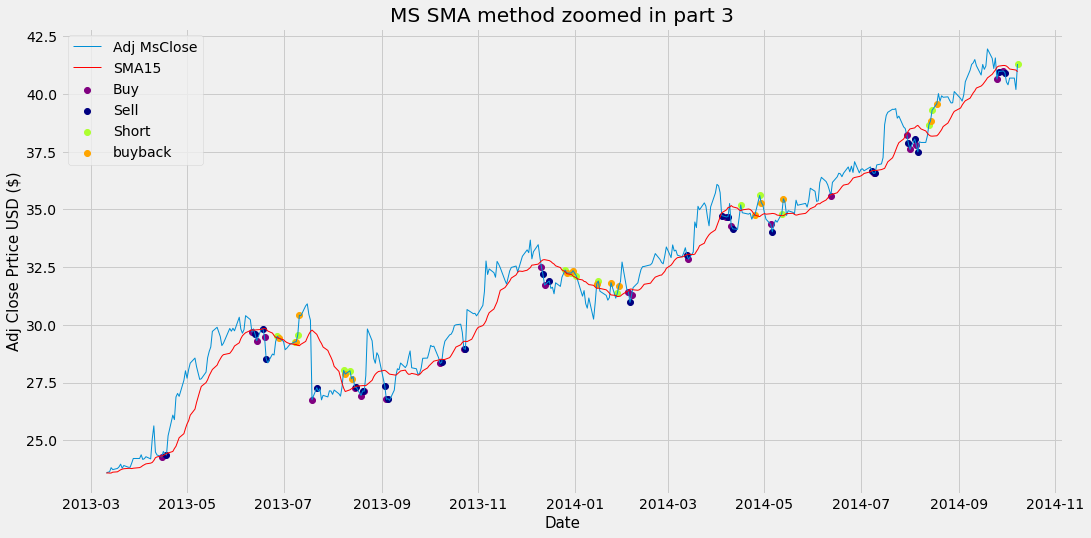

In [25]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 3")

plt.plot(dfMSSMA["Adj Close"][800:1200],linewidth=1)
plt.plot(dfMSSMA["SMA15"][800:1200],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Buy"][800:1200], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Sell"][800:1200], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Short"][800:1200], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Buyback"][800:1200], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj MsClose","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

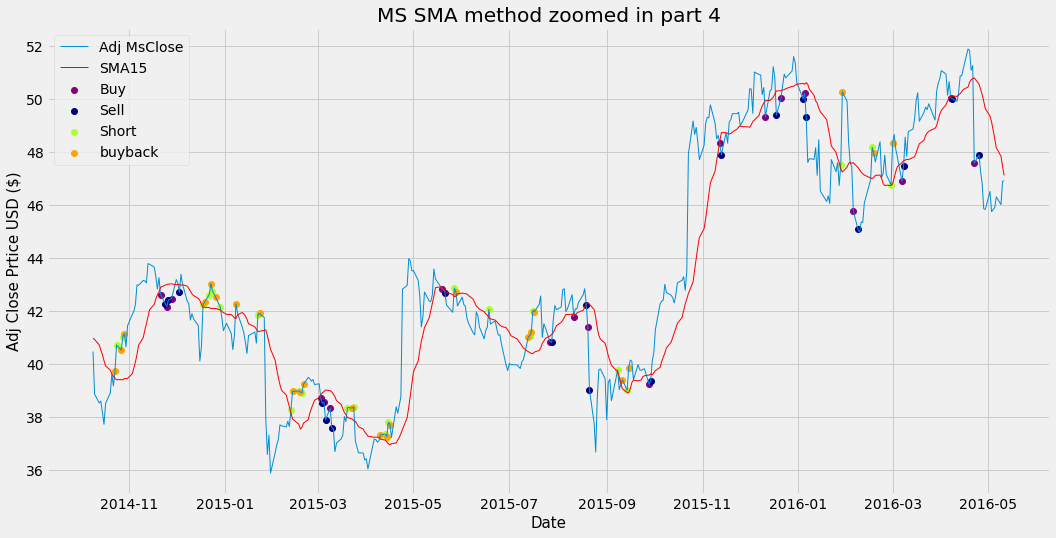

In [26]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 4")

plt.plot(dfMSSMA["Adj Close"][1200:1600],linewidth=1)
plt.plot(dfMSSMA["SMA15"][1200:1600],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Buy"][1200:1600], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Sell"][1200:1600], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Short"][1200:1600], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Buyback"][1200:1600], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj MsClose","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

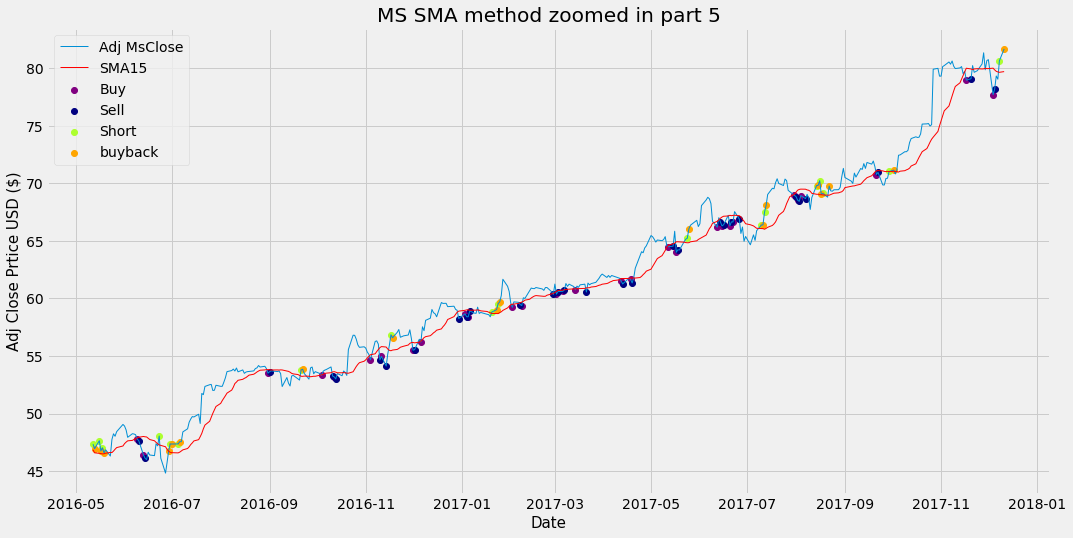

In [27]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 5")

plt.plot(dfMSSMA["Adj Close"][1600:2000],linewidth=1)
plt.plot(dfMSSMA["SMA15"][1600:2000],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Buy"][1600:2000], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Sell"][1600:2000], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Short"][1600:2000], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Buyback"][1600:2000], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj MsClose","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

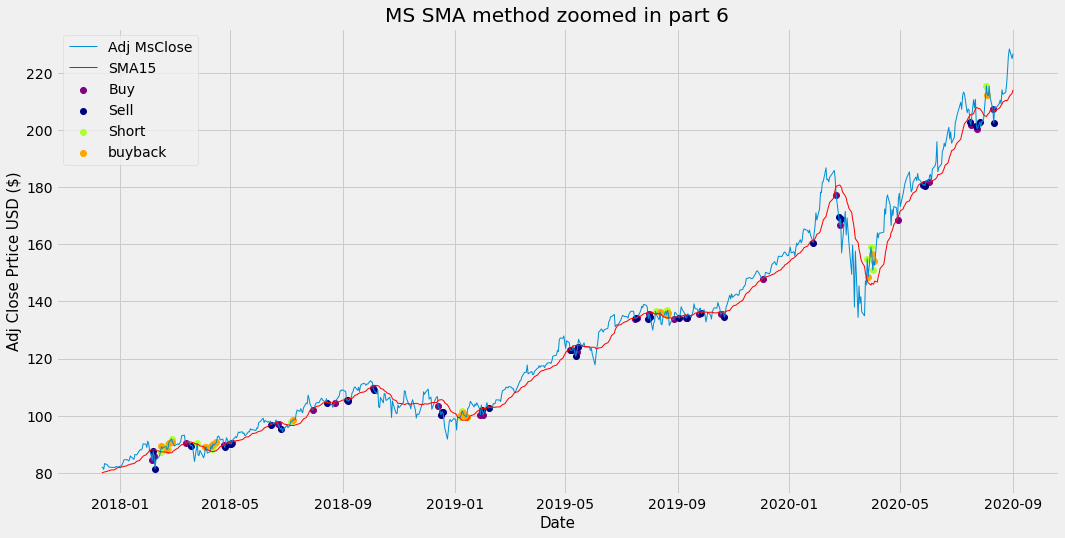

In [28]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 6")

plt.plot(dfMSSMA["Adj Close"][2000:],linewidth=1)
plt.plot(dfMSSMA["SMA15"][2000:],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Buy"][2000:], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Sell"][2000:], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Short"][2000:], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Buyback"][2000:], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj MsClose","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

In [91]:
# this is an interactive visualisation   you can zoom in etc.
from bokeh.models import ColumnDataSource , HoverTool
from bokeh.plotting import figure, output_file, show, output_notebook

output_notebook()

date = pd.to_datetime(dfMSSMA.index.tolist())

# source_dict = {"xs":date  # tried another method to show x correctly
# }
# source_dict["close"]=list(dfMSSMA["Adj Close"])
# source_dict["SMA"]=list(dfMSSMA["SMA15"])
# source_dict["buy"]=list(dfMSSMA["15Buy"])
# source_dict["sell"]=list(dfMSSMA["15Sell"])
# source_dict["short"]=list(dfMSSMA["15Short"])
# source_dict["buyback"]=list(dfMSSMA["15Buyback"])
# source = ColumnDataSource(data=source_dict)


source = ColumnDataSource(data = dict(
    xs = date,
    close = dfMSSMA["Adj Close"],
    SMA=dfMSSMA["SMA15"],
    buy =dfMSSMA["15Buy"],
    sell=dfMSSMA["15Sell"],
    short =dfMSSMA["15Short"],
    buyback=dfMSSMA["15Buyback"]
))


p = figure(title="Interactive Plot", x_axis_label='Date', y_axis_label='Price', height=600, x_axis_type="datetime")

#line
p.line("xs", "close", legend_label="Adj MsClose", line_width=1, source=source)
p.line("xs", "SMA", legend_label="MsSMA", line_width=1, source=source, color="red")
#scatter
p.circle("xs", "buy",  source=source, color="purple", legend_label="buy")
p.circle("xs", "sell",  source=source, color="navy", legend_label="sell")
p.circle("xs", "short",  source=source, color="greenyellow", legend_label="short")
p.circle("xs", "buyback",  source=source, color="orange", legend_label="buyback")


hover=HoverTool(
    tooltips=[
        ( 'date',   '$x{%F}'),
        ( 'Adj Close',  '$@{close}' ),
    ],

    formatters={
        '$x'        : 'datetime',                                       
    },

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='mouse'
)
p.add_tools(hover)
p.sizing_mode = "stretch_width"

show(p)

Loading BokehJS ...

Just from looking at the diagramms(which is hard) it does not seem, like this method is very successful.

In [30]:
MSBought, MSSold, MSShorted, MSBoughtback=createLog15(dfMSSMA)

In [31]:
print(len(MSBought), len(MSSold),len(MSShorted), len(MSBoughtback))
#everything we bought, we also sold, but in theory we could have 1 stock at the end of the timespan

149 149 115 115


In [32]:
# made=0# check which is longer
# for i in range(len(MSBought)):
#     made+=(MSSold[i]-MSBought[i])
# made # the amount we gained/lost

In [33]:
# made2=0
# for i in range(len(MSBoughtback)):
#     made2+=(MSShorted[i]-MSBoughtback[i])
# made2 # the amount we gained/lost

In [34]:
made=statistics.mean(MSSold)-statistics.mean(MSBought)
print(made)
made2=statistics.mean(MSShorted)-statistics.mean(MSBoughtback)
print(made2)

0.26275657807420316
0.04327213453210277


In [35]:
netgain=made+made2
print("we gained {:.2f} $ using this method".format(netgain))

we gained 0.31 $ using this method


This amount is horrible for the effort, especially if we have to play a fee whenever we trade.<br>
Now we also test the same method using SMA30.

# SMA30

In [36]:
MSSMA30Buy, MSSMA30Sell, MSSMA30Short, MSSMA30Buyback=SMA30BuyAlg(dfMSSMA)
dfMSSMA["30Buy"]=MSSMA30Buy
dfMSSMA["30Sell"]=MSSMA30Sell
dfMSSMA["30Short"]=MSSMA30Short
dfMSSMA["30Buyback"]=MSSMA30Buyback

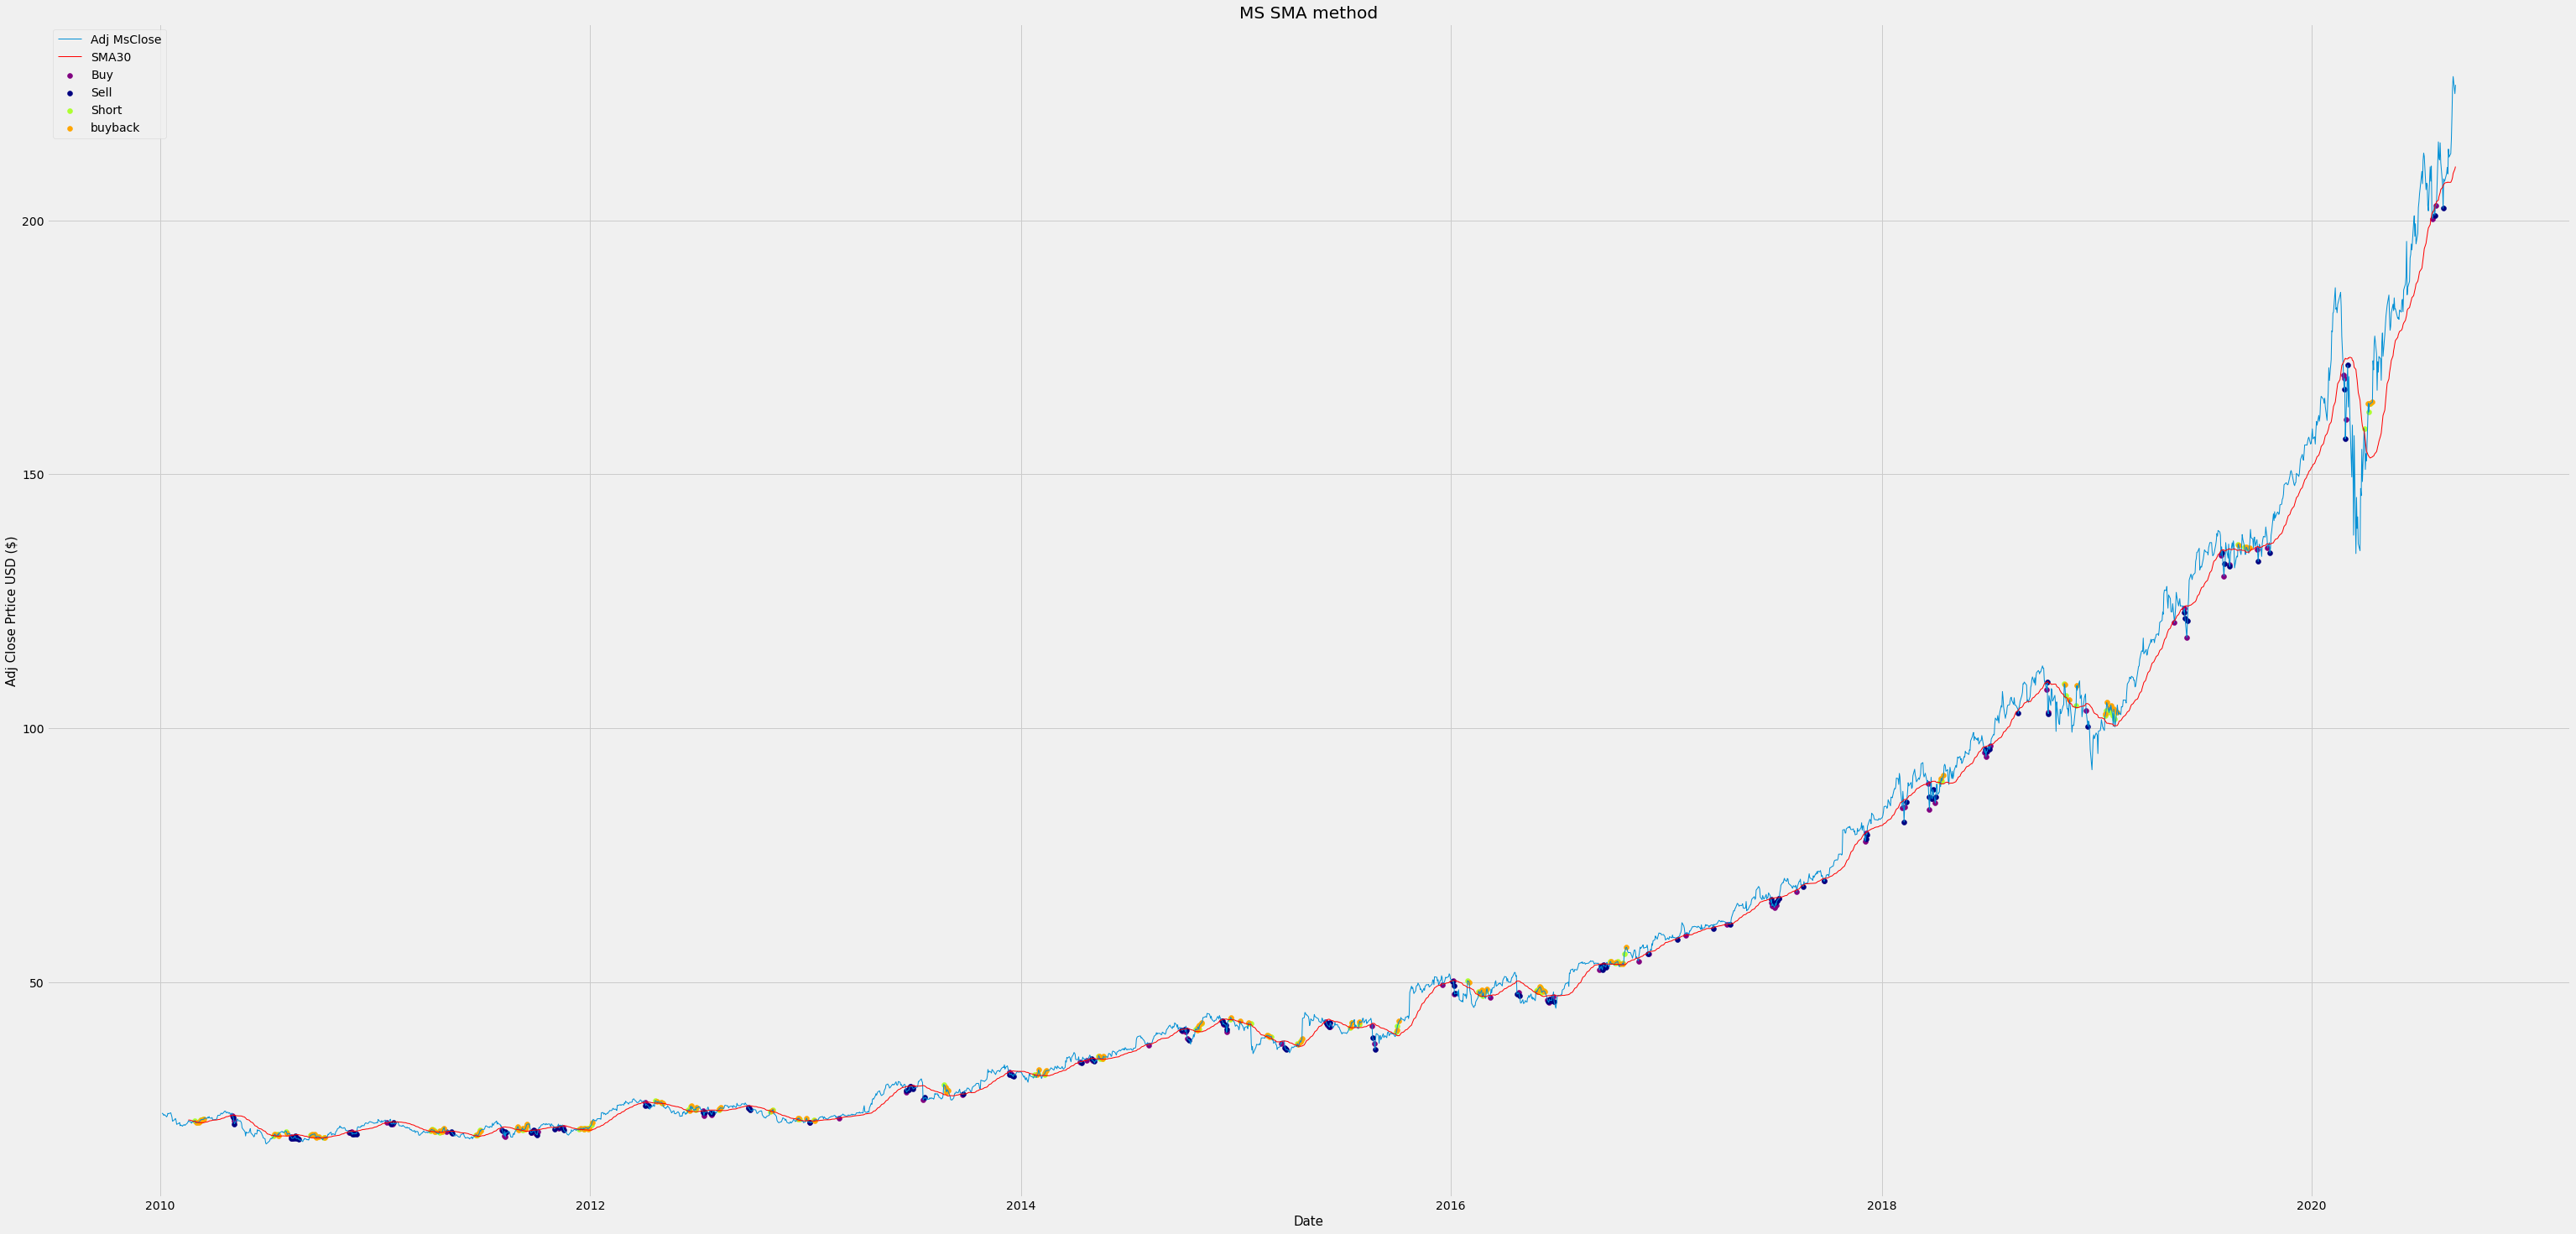

In [37]:
plt.figure(figsize=(16*3,8*3))
plt.title("MS SMA method")

plt.plot(dfMSSMA["Adj Close"],linewidth=1)
plt.plot(dfMSSMA["SMA30"],linewidth=1, color="red")

plt.scatter(dfMSSMA.index,dfMSSMA["30Buy"], color="purple")
plt.scatter(dfMSSMA.index,dfMSSMA["30Sell"], color="navy")
plt.scatter(dfMSSMA.index,dfMSSMA["30Short"], color="greenyellow")
plt.scatter(dfMSSMA.index,dfMSSMA["30Buyback"], color="orange")

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj MsClose","SMA30","Buy", "Sell", "Short", "buyback"], loc="upper left")

I won't zoom in again, as we have already seen the principle and you can't see much anyways

In [38]:
MSBought, MSSold, MSShorted, MSBoughtback=createLog30(dfMSSMA)

In [39]:
made=statistics.mean(MSSold)-statistics.mean(MSBought)
print(made)
made2=statistics.mean(MSShorted)-statistics.mean(MSBoughtback)
print(made2)

0.16211651919181236
-0.24815284293129736


In [40]:
netgain=made+made2
print("we gained {:.2f} $ using this method".format(netgain))

we gained -0.09 $ using this method


If we use 30 days for the SMA the results get even worse. But this is  just 1 example, now we test on the other stocks.

# 1.2.2 Apple

In [41]:
dfASMA=dfA.copy()
for i in range(30+1,dfASMA.shape[0]):#SMA with 15 days
    dfASMA.loc[dfASMA.index[i],'SMA15'] = ((dfASMA["Adj Close"][i-15:i].sum())/15)
for i in range(30+1,dfASMA.shape[0]):#SMA with 30 days
    dfASMA.loc[dfASMA.index[i],'SMA30'] = ((dfASMA["Adj Close"][i-30:i].sum())/30)
dfASMA.tail()

,Adj Close,SMA15,SMA30
Date,,,
2020-08-26,126.304596,115.727635,106.785059
2020-08-27,124.794701,116.836262,107.749176
2020-08-28,124.592552,117.589130,108.702904
2020-08-31,128.817749,118.500558,109.656371
2020-09-01,133.948898,119.586184,110.683250


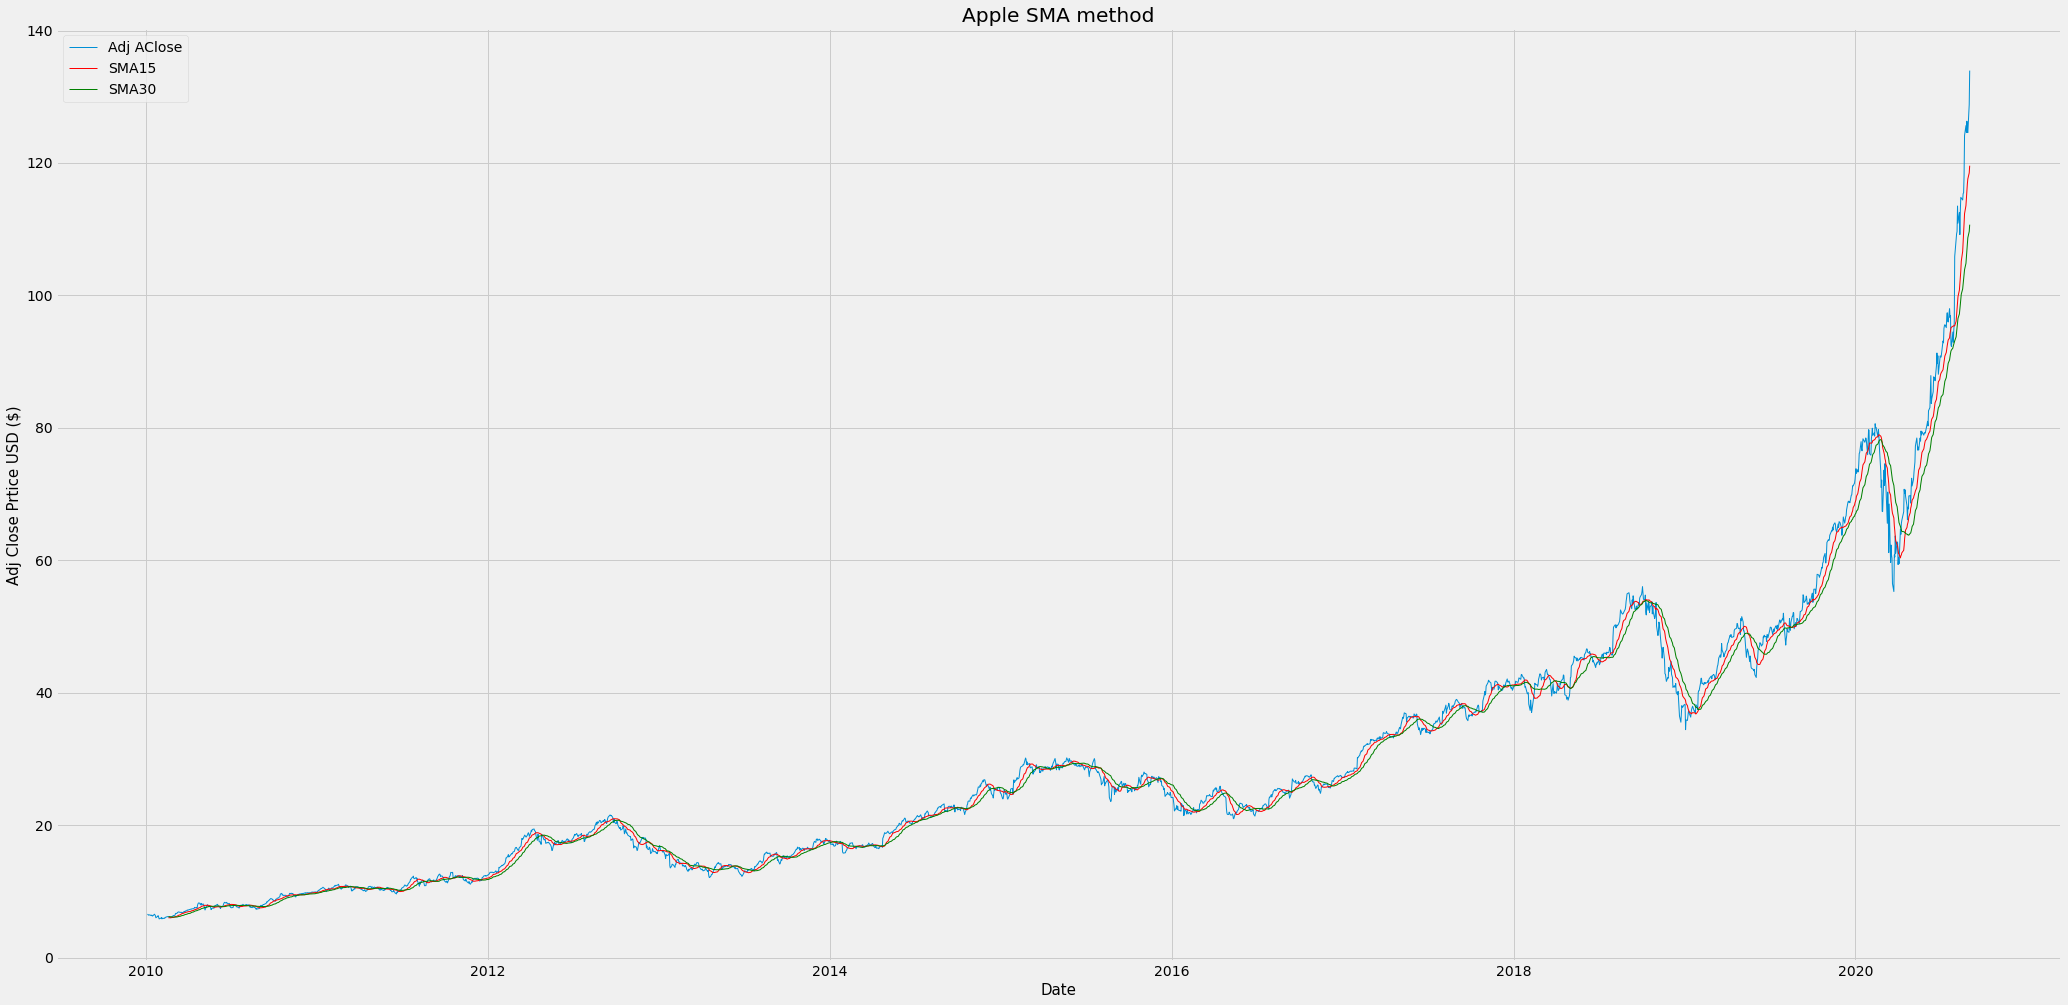

In [42]:
plt.figure(figsize=(16*2,8*2))
plt.title("Apple SMA method")
plt.plot(dfASMA["Adj Close"],linewidth=1)
plt.plot(dfASMA["SMA15"],linewidth=1, color="red")
plt.plot(dfASMA["SMA30"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj AClose","SMA15","SMA30"], loc="upper left") 

# SMA15

In [43]:
ASMA15Buy, ASMA15Sell, ASMA15Short, ASMA15Buyback=SMA15BuyAlg(dfASMA)
dfASMA["15Buy"]=ASMA15Buy
dfASMA["15Sell"]=ASMA15Sell
dfASMA["15Short"]=ASMA15Short
dfASMA["15Buyback"]=ASMA15Buyback
dfASMA.tail()

,Adj Close,SMA15,SMA30,15Buy,15Sell,15Short,15Buyback
Date,,,,,,,
2020-08-26,126.304596,115.727635,106.785059,NaN,NaN,NaN,NaN
2020-08-27,124.794701,116.836262,107.749176,NaN,NaN,NaN,NaN
2020-08-28,124.592552,117.589130,108.702904,NaN,NaN,NaN,NaN
2020-08-31,128.817749,118.500558,109.656371,NaN,NaN,NaN,NaN
2020-09-01,133.948898,119.586184,110.683250,NaN,NaN,NaN,NaN


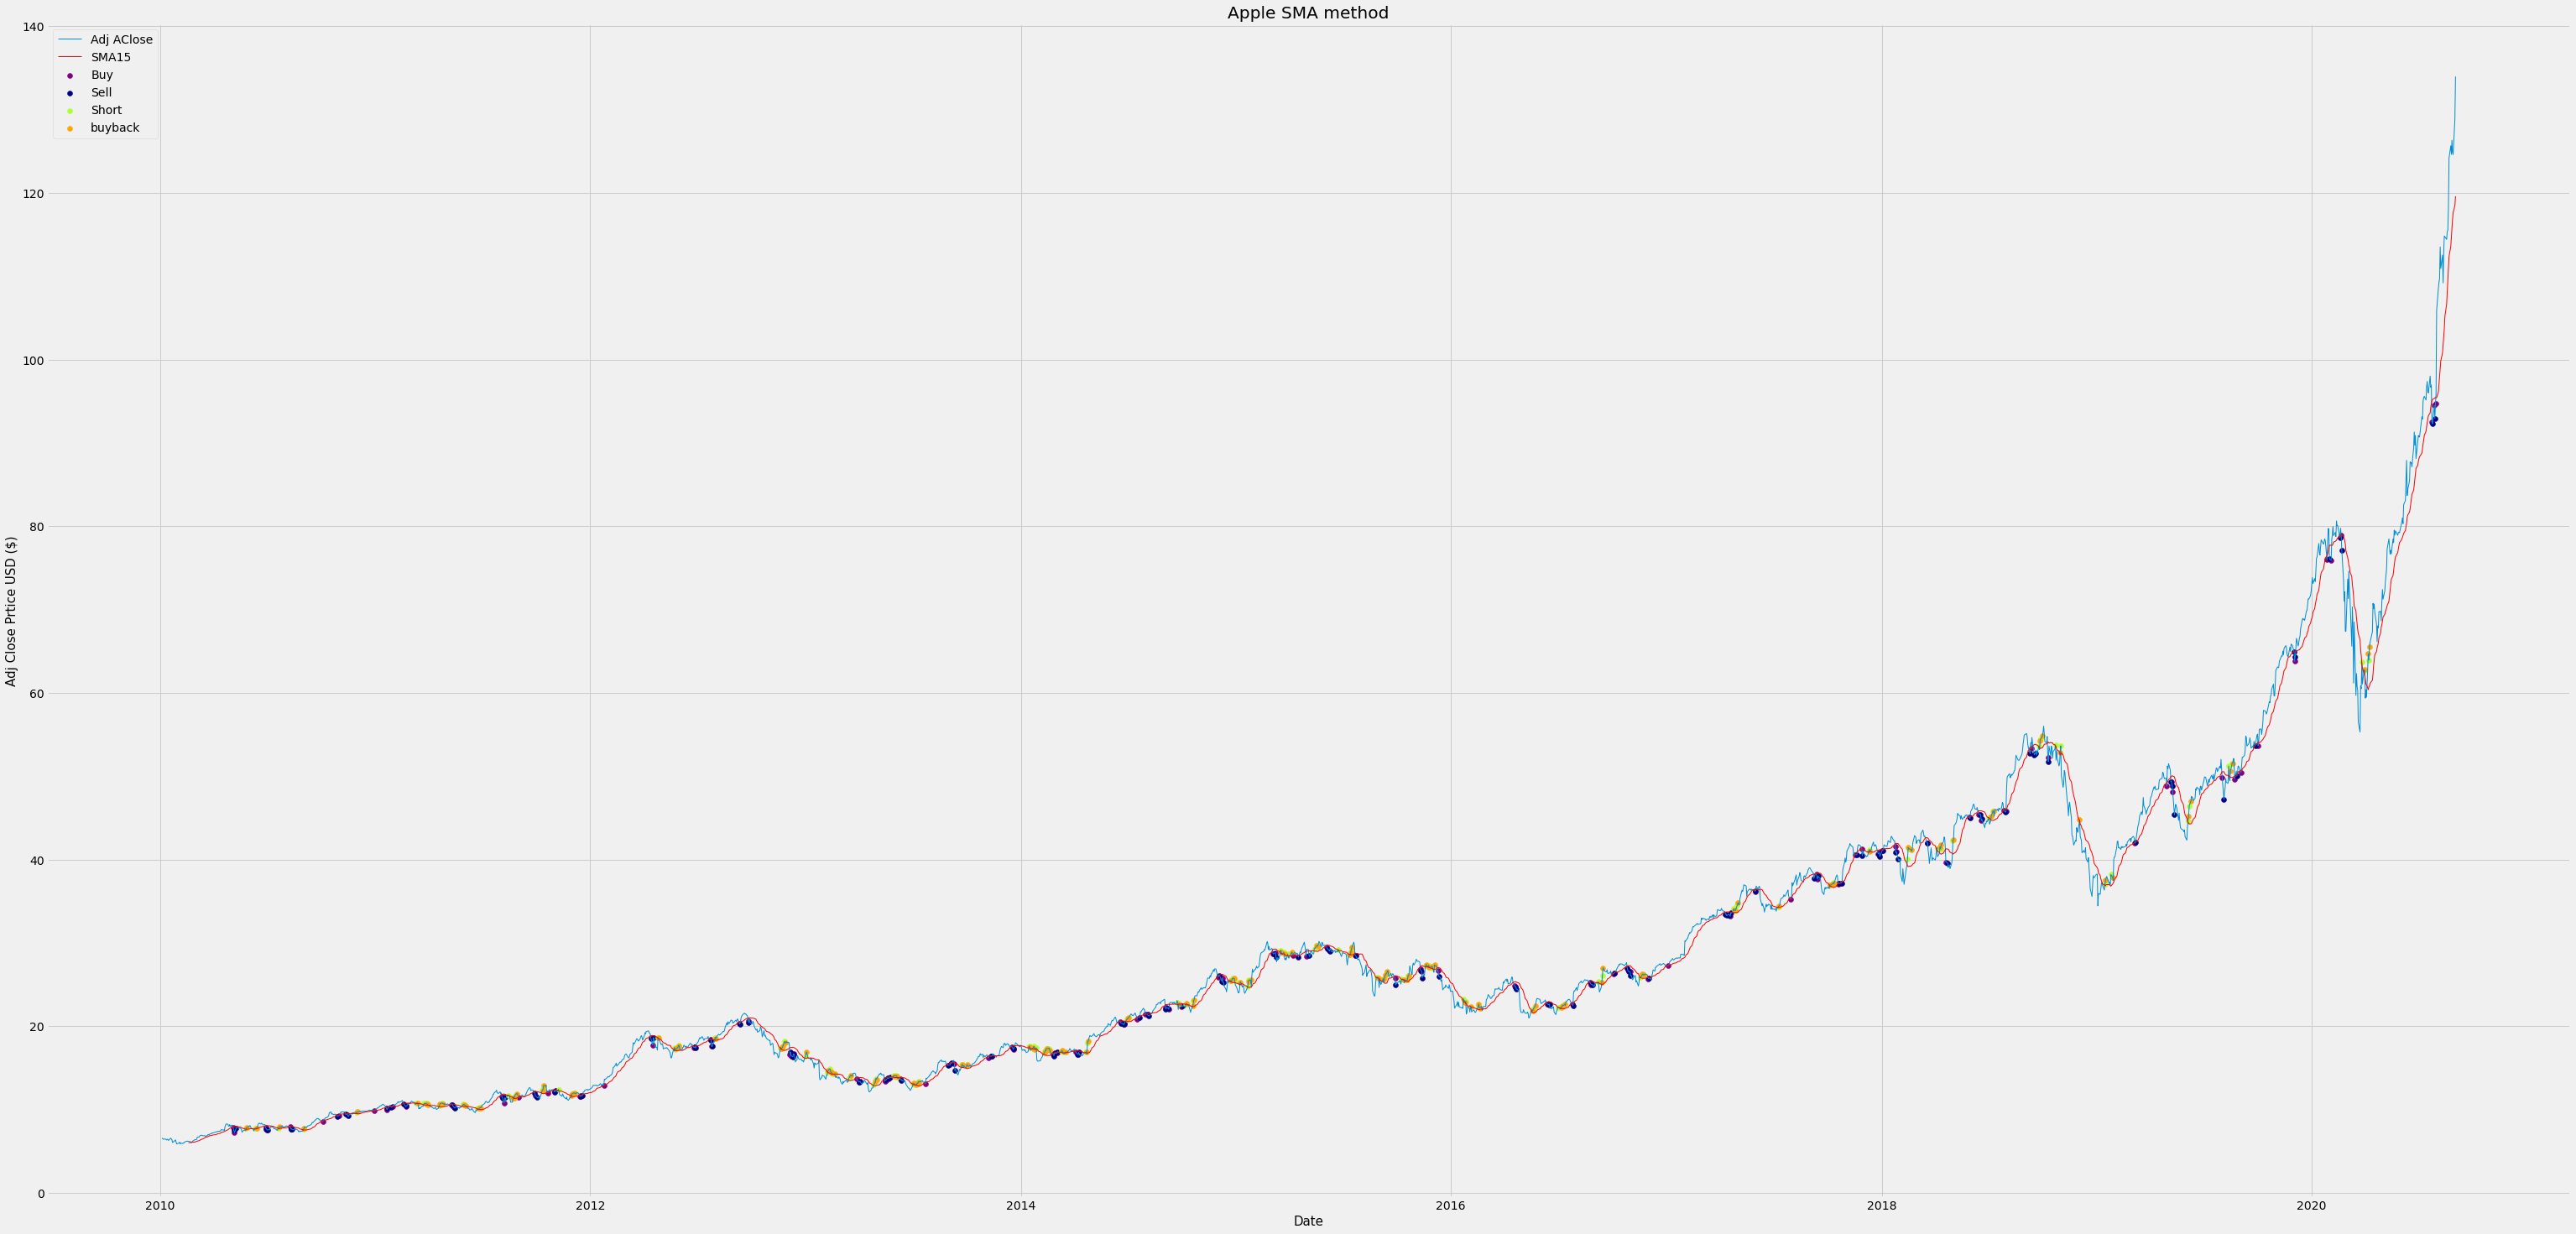

In [44]:
plt.figure(figsize=(16*3,8*3))
plt.title("Apple SMA method")

plt.plot(dfASMA["Adj Close"],linewidth=1)
plt.plot(dfASMA["SMA15"],linewidth=1, color="red")

plt.scatter(dfASMA.index,dfASMA["15Buy"], color="purple")
plt.scatter(dfASMA.index,dfASMA["15Sell"], color="navy")
plt.scatter(dfASMA.index,dfASMA["15Short"], color="greenyellow")
plt.scatter(dfASMA.index,dfASMA["15Buyback"], color="orange")

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj AClose","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

We wont zoom in on every part again, just 1 as example

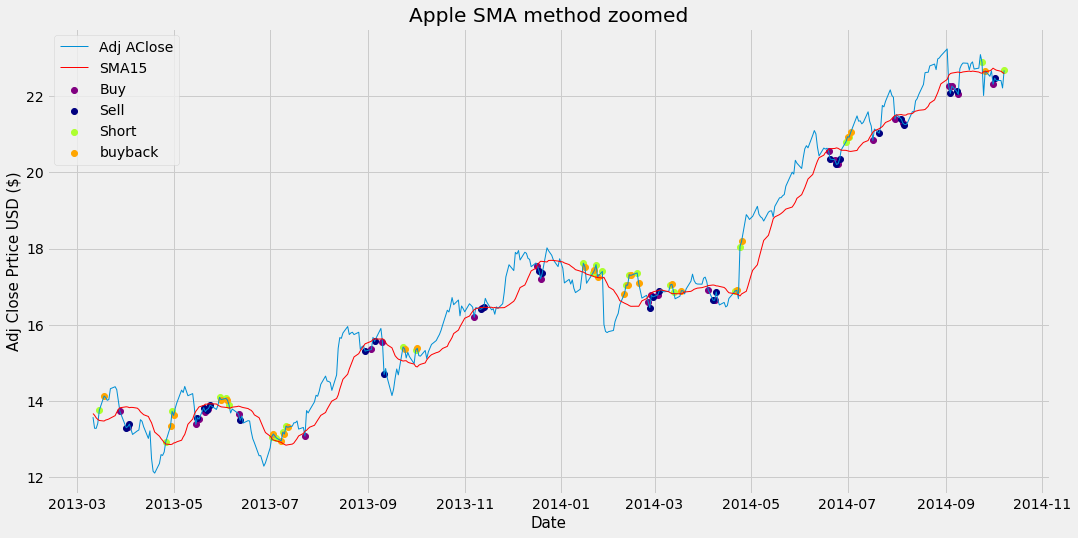

In [45]:
plt.figure(figsize=(16,8))
plt.title("Apple SMA method zoomed")

plt.plot(dfASMA["Adj Close"][800:1200],linewidth=1)
plt.plot(dfASMA["SMA15"][800:1200],linewidth=1, color="red")

plt.scatter(dfASMA.index[800:1200],dfASMA["15Buy"][800:1200], color="purple",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["15Sell"][800:1200], color="navy",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["15Short"][800:1200], color="greenyellow",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["15Buyback"][800:1200], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj AClose","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

In [46]:
ABought, ASold, AShorted, ABoughtback=createLog15(dfASMA)

In [47]:
made=statistics.mean(ASold)-statistics.mean(ABought)
print(made)
made2=statistics.mean(AShorted)-statistics.mean(ABoughtback)
print(made2)

-0.26587573917203144
-0.06444746221043118


In [48]:
netgain=made+made2
print("we gained {:.2f} $ using this method with Apple.".format(netgain))

we gained -0.33 $ using this method with Apple.


# SMA30

In [49]:
ASMA30Buy, ASMA30Sell, ASMA30Short, ASMA30Buyback=SMA30BuyAlg(dfASMA)
dfASMA["30Buy"]=ASMA30Buy
dfASMA["30Sell"]=ASMA30Sell
dfASMA["30Short"]=ASMA30Short
dfASMA["30Buyback"]=ASMA30Buyback

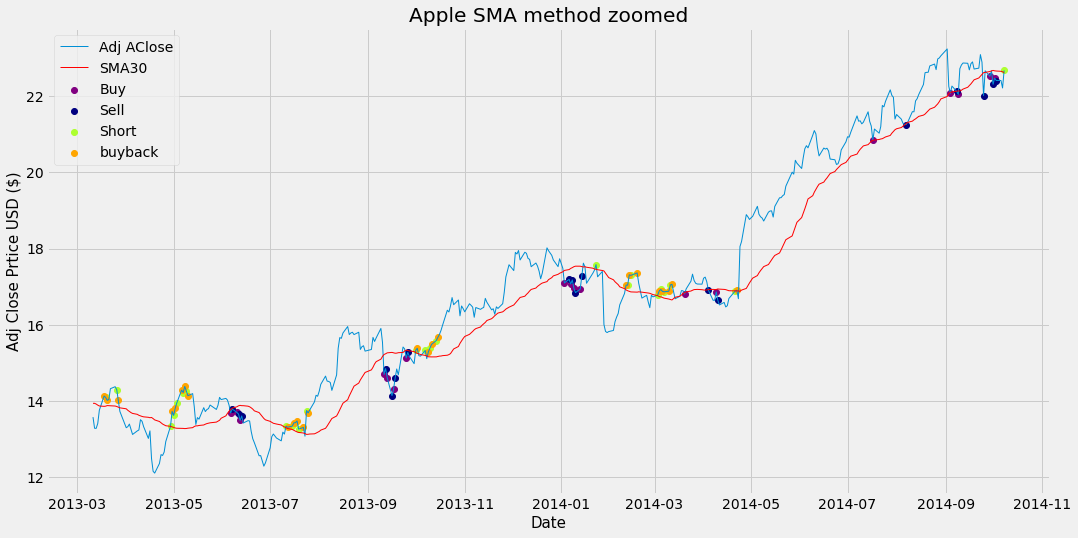

In [50]:
plt.figure(figsize=(16,8))
plt.title("Apple SMA method zoomed")

plt.plot(dfASMA["Adj Close"][800:1200],linewidth=1)
plt.plot(dfASMA["SMA30"][800:1200],linewidth=1, color="red")

plt.scatter(dfASMA.index[800:1200],dfASMA["30Buy"][800:1200], color="purple",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["30Sell"][800:1200], color="navy",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["30Short"][800:1200], color="greenyellow",linewidth=1)
plt.scatter(dfASMA.index[800:1200],dfASMA["30Buyback"][800:1200], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj AClose","SMA30","Buy", "Sell", "Short", "buyback"], loc="upper left")

In [51]:
made=statistics.mean(ASold)-statistics.mean(ABought)
print(made)
made2=statistics.mean(AShorted)-statistics.mean(ABoughtback)
print(made2)

-0.26587573917203144
-0.06444746221043118


In [52]:
netgain=made+made2
print("we gained {:.2f} $ using this method with Apple.".format(netgain))

we gained -0.33 $ using this method with Apple.


similar to SMA15

# 1.2.3 HP

In [53]:
dfHPSMA=dfHP.copy()
for i in range(30+1,dfHPSMA.shape[0]):#SMA with 15 days
    dfHPSMA.loc[dfHPSMA.index[i],'SMA15'] = ((dfHPSMA["Adj Close"][i-15:i].sum())/15)
for i in range(30+1,dfASMA.shape[0]):#SMA with 30 days
    dfHPSMA.loc[dfHPSMA.index[i],'SMA30'] = ((dfHPSMA["Adj Close"][i-30:i].sum())/30)
dfHPSMA.tail()

,Adj Close,SMA15,SMA30
Date,,,
2020-08-26,16.330271,17.961772,18.219515
2020-08-27,16.369694,17.802133,18.136131
2020-08-28,16.744196,17.685307,18.059246
2020-08-31,16.241573,17.606412,18.029196
2020-09-01,16.507668,17.430490,17.984985


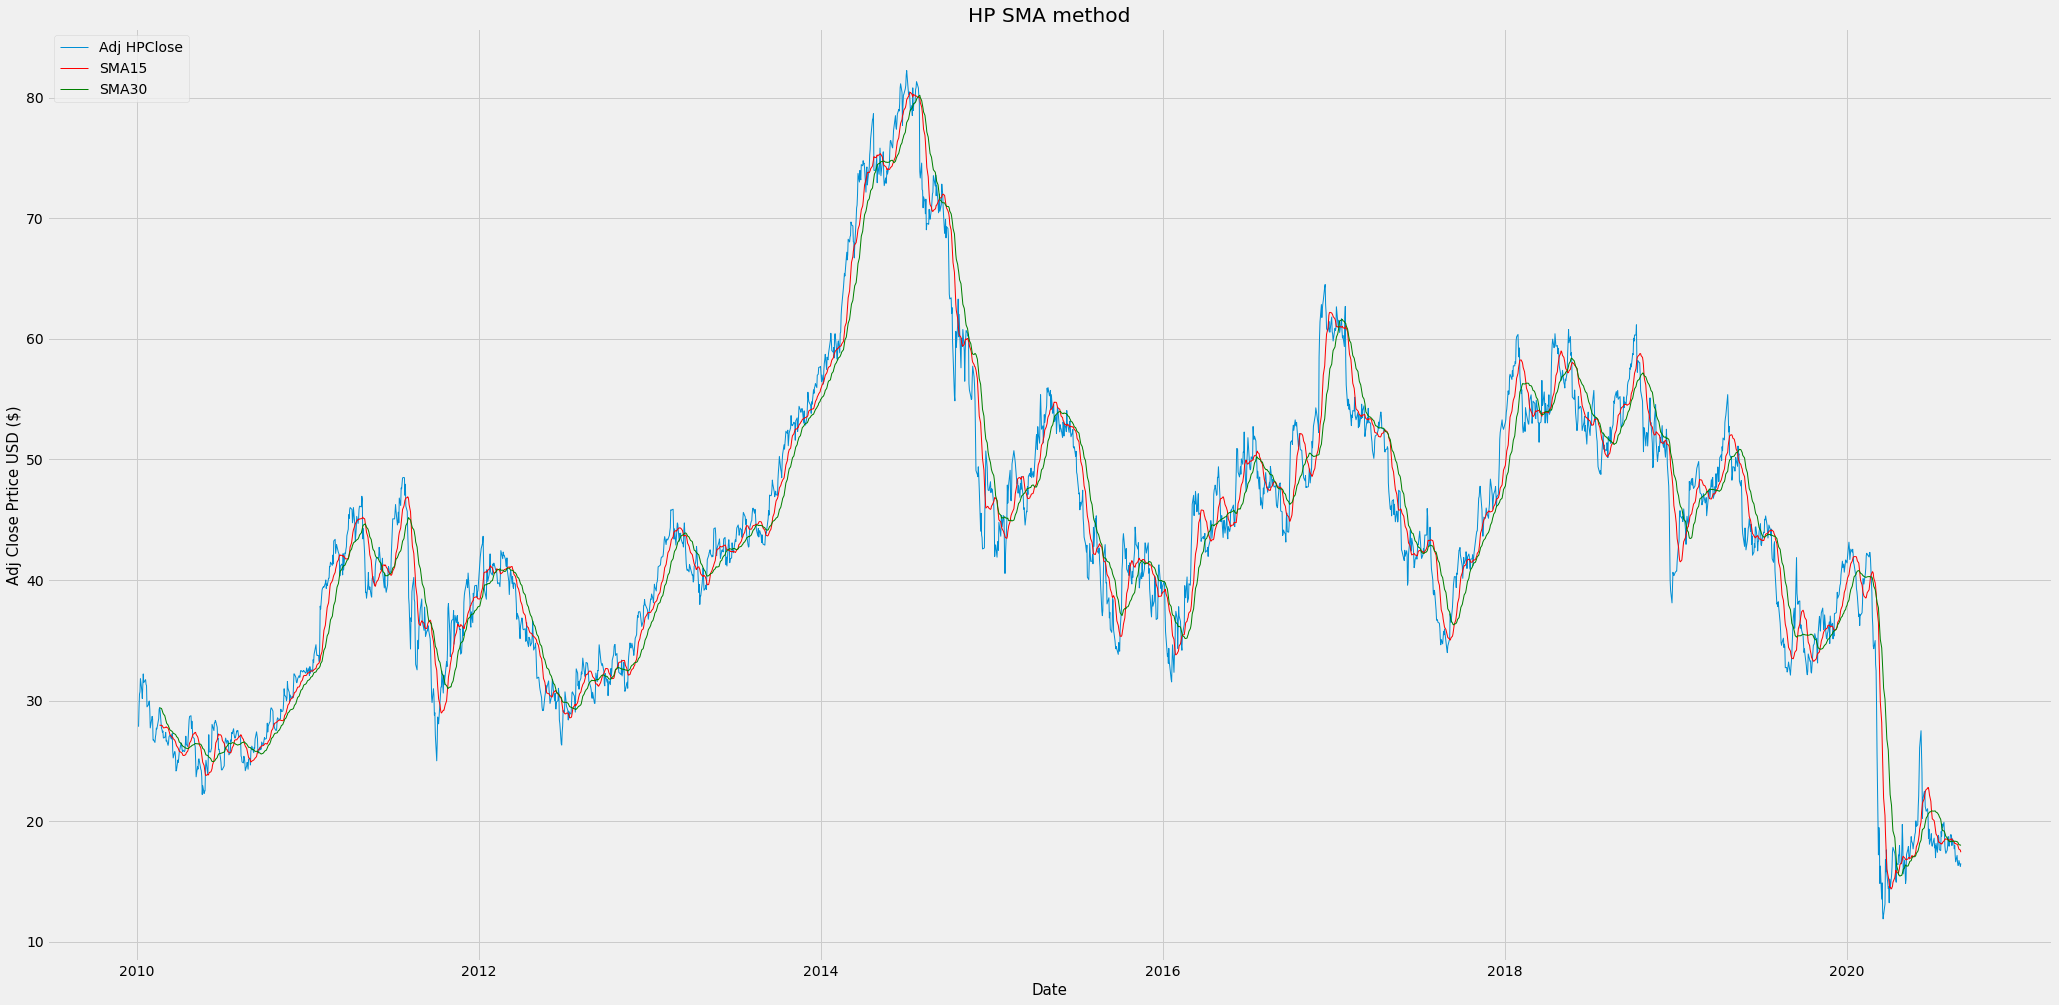

In [54]:
plt.figure(figsize=(16*2,8*2))
plt.title("HP SMA method")
plt.plot(dfHPSMA["Adj Close"],linewidth=1)
plt.plot(dfHPSMA["SMA15"],linewidth=1, color="red")
plt.plot(dfHPSMA["SMA30"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj HPClose","SMA15","SMA30"], loc="upper left") 

# SMA15

In [55]:
HPSMA15Buy, HPSMA15Sell, HPSMA15Short, HPSMA15Buyback=SMA15BuyAlg(dfHPSMA)
dfHPSMA["15Buy"]=HPSMA15Buy
dfHPSMA["15Sell"]=HPSMA15Sell
dfHPSMA["15Short"]=HPSMA15Short
dfHPSMA["15Buyback"]=HPSMA15Buyback
dfHPSMA.tail()

,Adj Close,SMA15,SMA30,15Buy,15Sell,15Short,15Buyback
Date,,,,,,,
2020-08-26,16.330271,17.961772,18.219515,NaN,NaN,NaN,NaN
2020-08-27,16.369694,17.802133,18.136131,NaN,NaN,NaN,NaN
2020-08-28,16.744196,17.685307,18.059246,NaN,NaN,NaN,NaN
2020-08-31,16.241573,17.606412,18.029196,NaN,NaN,NaN,NaN
2020-09-01,16.507668,17.430490,17.984985,NaN,NaN,NaN,NaN


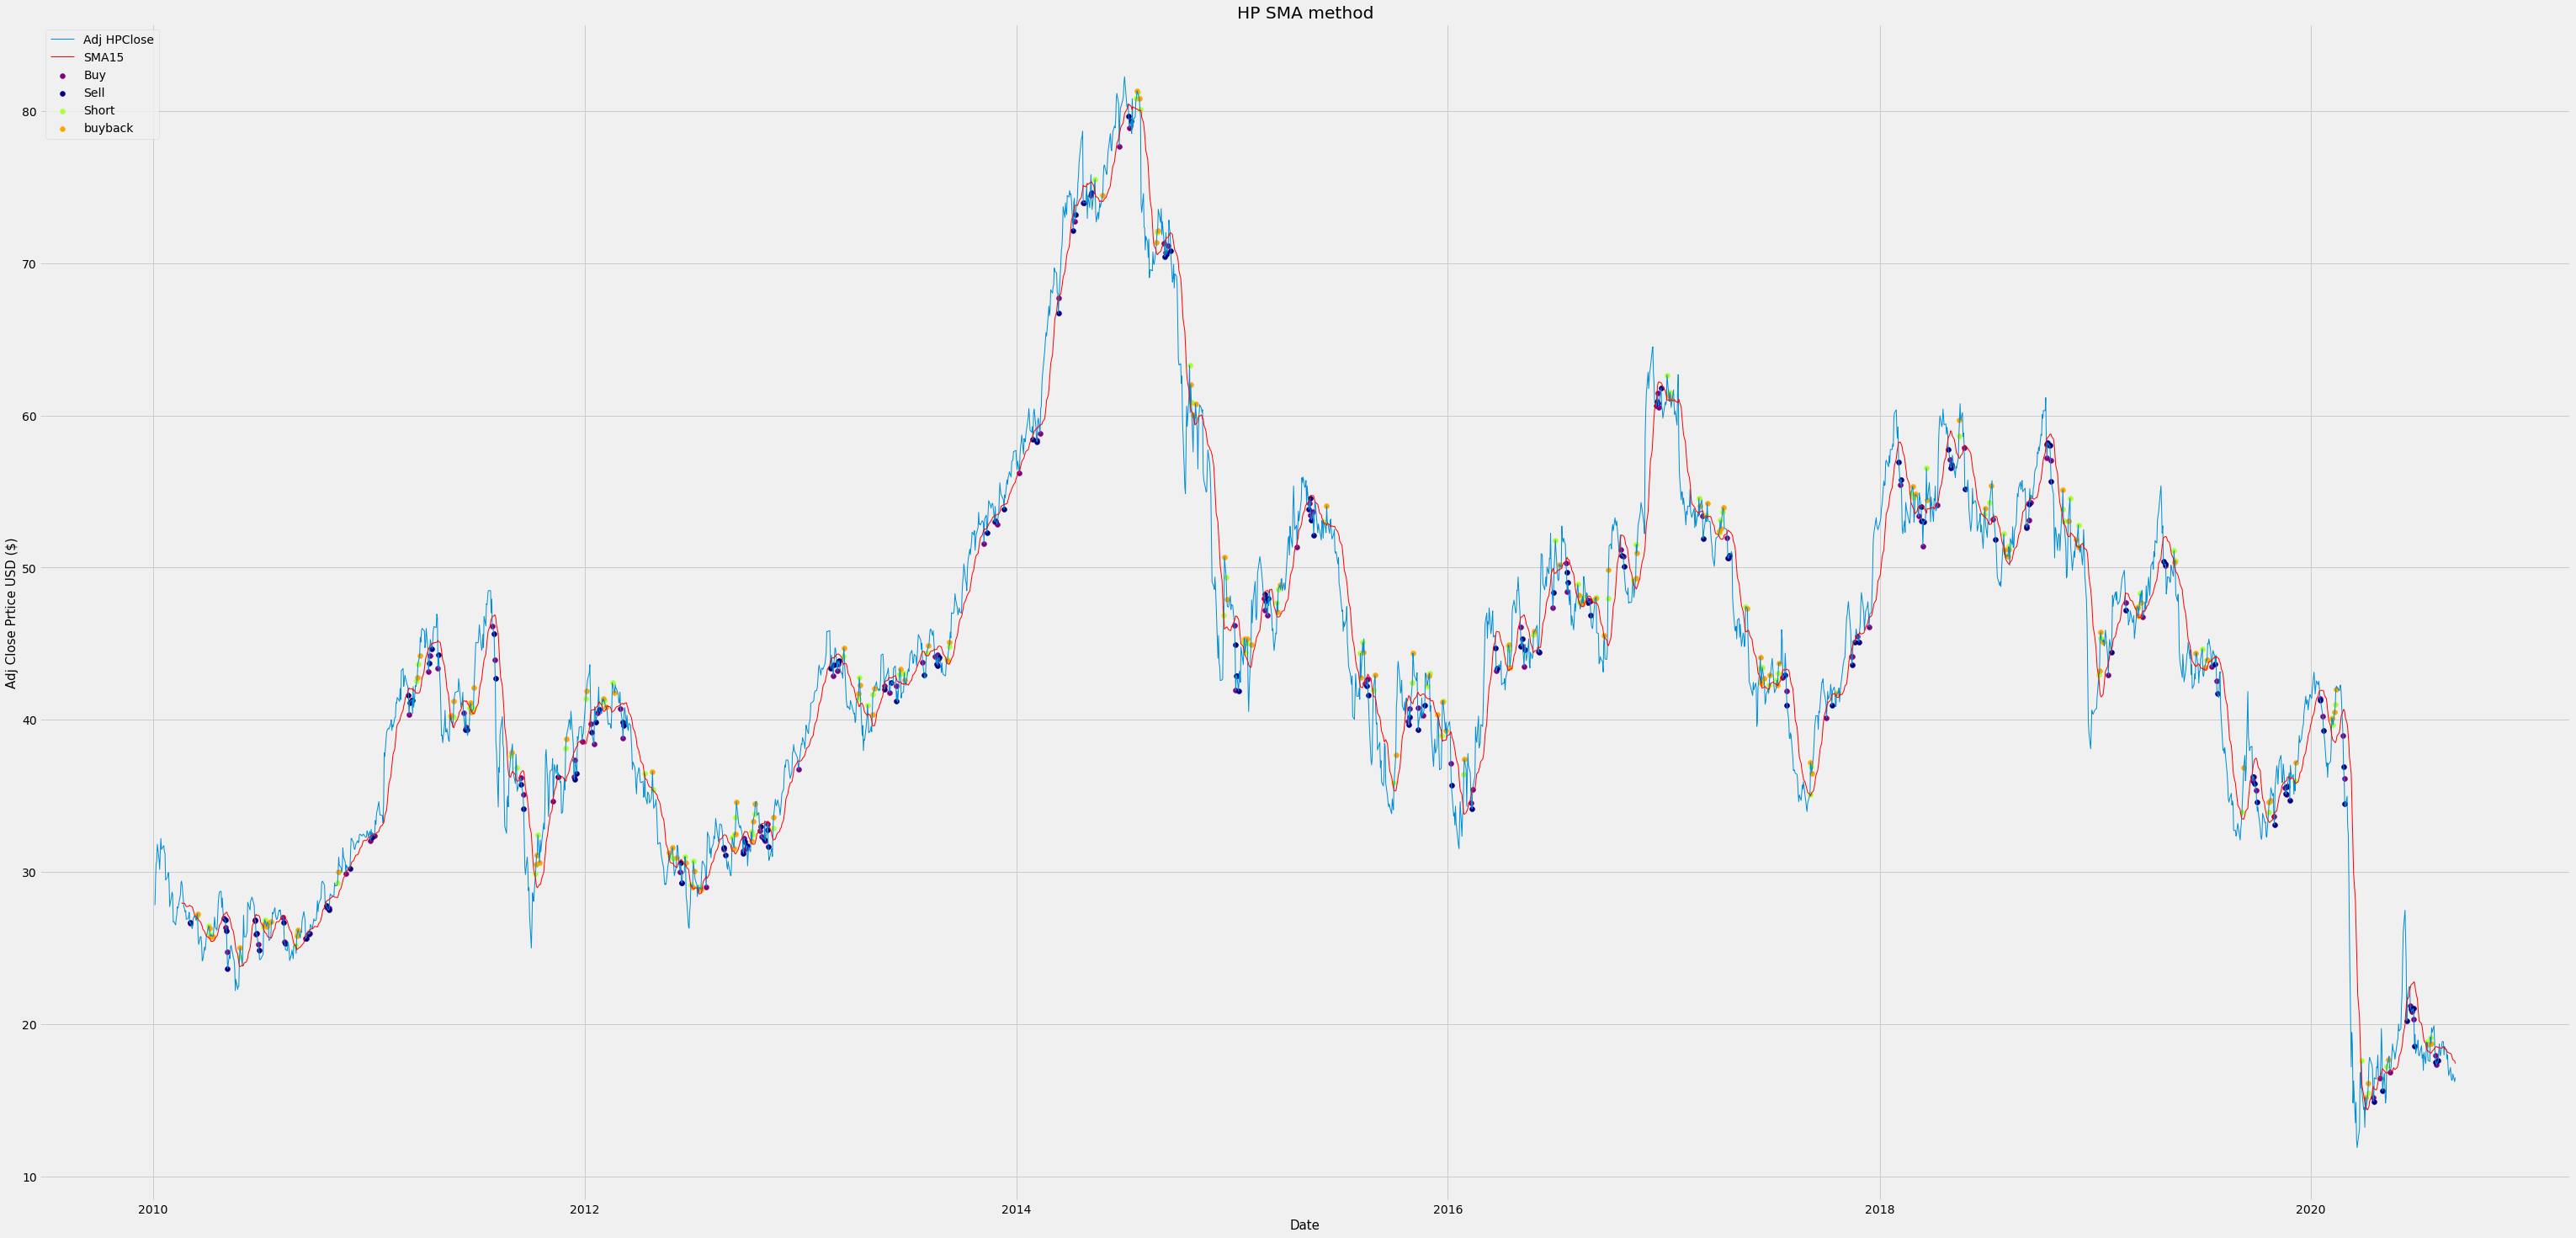

In [56]:
plt.figure(figsize=(16*3,8*3))
plt.title("HP SMA method")

plt.plot(dfHPSMA["Adj Close"],linewidth=1)
plt.plot(dfHPSMA["SMA15"],linewidth=1, color="red")

plt.scatter(dfHPSMA.index,dfHPSMA["15Buy"], color="purple")
plt.scatter(dfHPSMA.index,dfHPSMA["15Sell"], color="navy")
plt.scatter(dfHPSMA.index,dfHPSMA["15Short"], color="greenyellow")
plt.scatter(dfHPSMA.index,dfHPSMA["15Buyback"], color="orange")

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj HPClose","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

We wont zoom in on every part again, just 1 as example

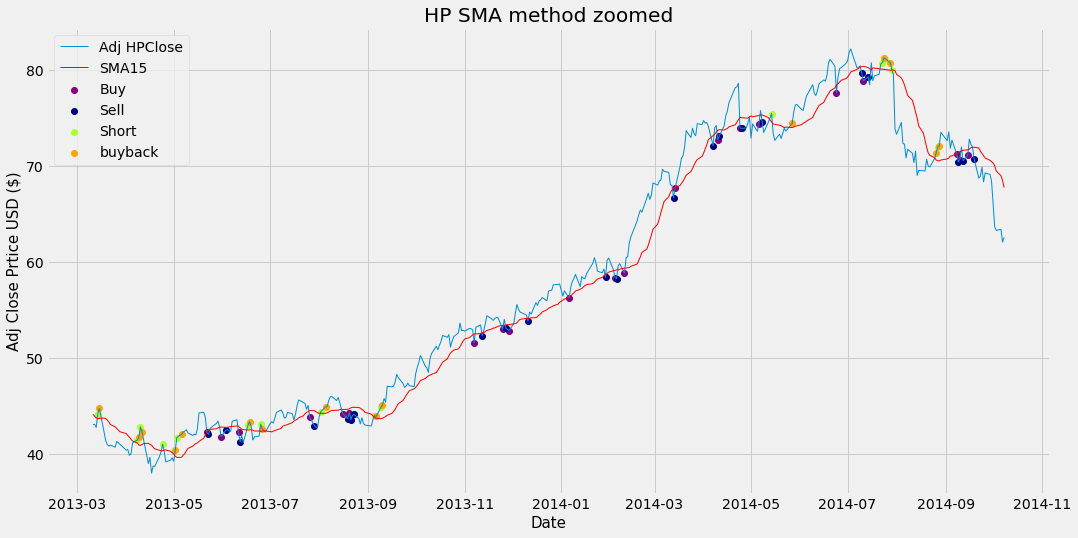

In [57]:
plt.figure(figsize=(16,8))
plt.title("HP SMA method zoomed")

plt.plot(dfHPSMA["Adj Close"][800:1200],linewidth=1)
plt.plot(dfHPSMA["SMA15"][800:1200],linewidth=1, color="red")

plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["15Buy"][800:1200], color="purple",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["15Sell"][800:1200], color="navy",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["15Short"][800:1200], color="greenyellow",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["15Buyback"][800:1200], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj HPClose","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

In [58]:
HPBought, HPSold, HPShorted, HPBoughtback=createLog15(dfHPSMA)

In [59]:
made=statistics.mean(HPSold)-statistics.mean(HPBought)
print(made)
made2=statistics.mean(HPShorted)-statistics.mean(HPBoughtback)
print(made2)

0.46576620100071153
0.05605743940059682


In [60]:
netgain=made+made2
print("we gained {:.2f} $ using this method with HP.".format(netgain))

we gained 0.52 $ using this method with HP.


# SMA30

In [61]:
HPSMA30Buy, HPSMA30Sell, HPSMA30Short, HPSMA30Buyback=SMA30BuyAlg(dfHPSMA)
dfHPSMA["30Buy"]=HPSMA30Buy
dfHPSMA["30Sell"]=HPSMA30Sell
dfHPSMA["30Short"]=HPSMA30Short
dfHPSMA["30Buyback"]=HPSMA30Buyback

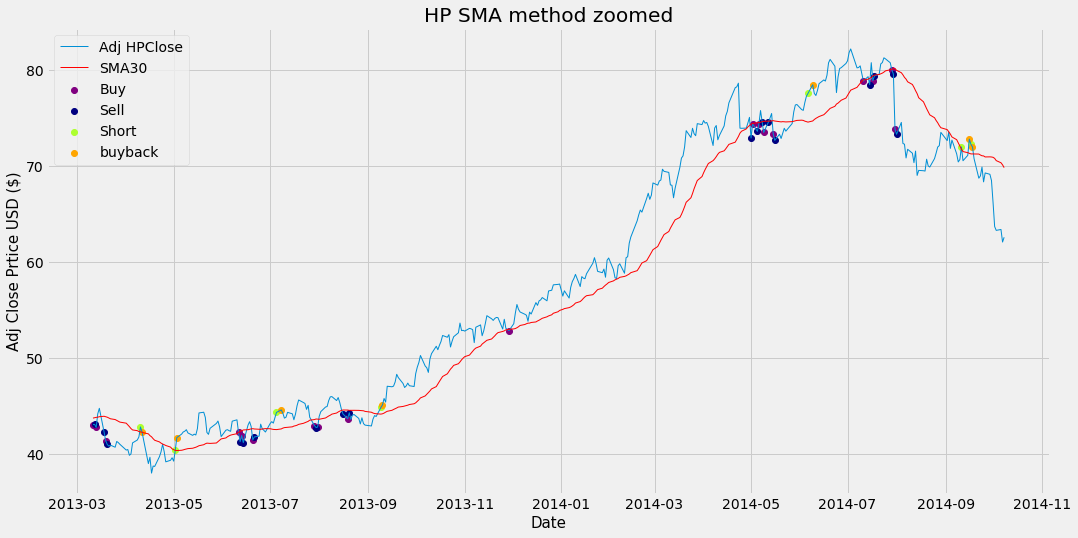

In [62]:
plt.figure(figsize=(16,8))
plt.title("HP SMA method zoomed")

plt.plot(dfHPSMA["Adj Close"][800:1200],linewidth=1)
plt.plot(dfHPSMA["SMA30"][800:1200],linewidth=1, color="red")

plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["30Buy"][800:1200], color="purple",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["30Sell"][800:1200], color="navy",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["30Short"][800:1200], color="greenyellow",linewidth=1)
plt.scatter(dfHPSMA.index[800:1200],dfHPSMA["30Buyback"][800:1200], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["Adj HPClose","SMA30","Buy", "Sell", "Short", "buyback"], loc="upper left")

In [63]:
HPBought, HPSold, HPShorted, HPBoughtback=createLog30(dfHPSMA)

In [64]:
made=statistics.mean(HPSold)-statistics.mean(HPBought)
print(made)
made2=statistics.mean(HPShorted)-statistics.mean(HPBoughtback)
print(made2)

0.32509559442188873
0.4609848093763702


In [65]:
netgain=made+made2
print("we gained {:.2f} $ using this method with HP.".format(netgain))

we gained 0.79 $ using this method with HP.


# 1.4 Analysis/Feedback

This method, or my execution of it does not seem to work that well. Especially if we add the cost for transactions the method is a waste of time and money.<br>
It is possible, that I messed up some lines, but the results are not very good. <br>
I would not recommend this Method to anyone. Obviously it is not a very complex one(see source) and I did not expect much of it.<br>
Using unadjusted Closing prives, opening prices... did not change the Method much